## IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
#Importing the data
#Link to data: https://drive.google.com/file/d/1z3AN8qN3Sz1UTkDp_Bd8pGi4qqb2rXxu/view?usp=sharing
url = 'https://drive.google.com/file/d/1z3AN8qN3Sz1UTkDp_Bd8pGi4qqb2rXxu/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
pd.set_option('display.max_colwidth', 500)
df.head(5)

,Text,Class
0,"Supply Quality China's EXCLUSIVE dimensions at Unbeatable Price.Dear Sir, We are pleased to inform you as one of China's largest export & import sto=ne company-Wanlistone Group, The Group its subsidiaries specialize in the q=uarrying, processing and Sales of dimension stone, slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen, South of China, which is the lar=gest export and import business portals ...",1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost you with a request that would be of immense benefit to both of us. Being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. The issue I am presenting to you is a case of my client who willed a fortune to his next-of-kin. It was most unfortunate that he and his next-of-kin died on the same day the 31st October 1999 in an Egyptian airline...",1
3,"MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD. BRANCH,CENTRAL HONG KONG,HONG KONG. Let me start by introducing myself. I am Mr.Cheung Pui director of operations of the Hang Seng Bank Ltd. I have an urgent business suggestion for you.I honestly apologize and hope I do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.Furthermore,due to this issue on my hands now,...",1
4,Not a surprising assessment from Embassy.,0


In [2]:
df.shape

(11929, 2)

In [3]:
#Check for missing values
df.dropna(inplace = True)
df.info()
#There are no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 11928 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.6+ KB


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
def plot_cm(y_actual,y_pred):
  cf_matrix = confusion_matrix(y_actual,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


def metrics(actual,pred):
  print('accuracy: %s%%' % round(accuracy_score(actual,pred)*100,0))
  print('precision: %s%%' % round(precision_score(actual,pred)*100,0))
  print('recall: %s%%' % round(recall_score(actual,pred)*100,0))
  print('f1_score: %s%%' % round(f1_score(actual,pred)*100,0))

## DATA CLEANING & PROCESSING

In [6]:
#Converting the text to lower case 
import re
df['Text'] = df['Text'].astype(str).apply(lambda x: x.lower()) 
df.head(5)

#Remove "=" symbol from data
df['Text'] = df['Text'].apply(lambda x: x.replace("=",''))
df.head(5)

,Text,Class
0,"supply quality china's exclusive dimensions at unbeatable price.dear sir, we are pleased to inform you as one of china's largest export & import stone company-wanlistone group, the group its subsidiaries specialize in the quarrying, processing and sales of dimension stone, slab and tiles and dimension stone products for the building materials sector and specialty markets2e the group operations are based in xiamen, south of china, which is the largest export and import business portals in chi...",1
1,over. sidlet me know. thx.,0
2,"dear friend,greetings to you.i wish to accost you with a request that would be of immense benefit to both of us. being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. the issue i am presenting to you is a case of my client who willed a fortune to his next-of-kin. it was most unfortunate that he and his next-of-kin died on the same day the 31st october 1999 in an egyptian airline...",1
3,"mr. cheung puihang seng bank ltd.des voeux rd. branch,central hong kong,hong kong. let me start by introducing myself. i am mr.cheung pui director of operations of the hang seng bank ltd. i have an urgent business suggestion for you.i honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.furthermore,due to this issue on my hands now,...",1
4,not a surprising assessment from embassy.,0


In [7]:
#Extracting url from the text
df['Url'] = df['Text'].apply(lambda x: re.findall("http\S+",x))
#Create new feature called Url_Count
df['Url_Count'] = df['Url'].apply(lambda x: len(x))

#Extracting email from the text 
df['Email'] = df['Text'].apply(lambda x: re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",x))
#Create new feature called Email_Count
df['Email_Count'] = df['Email'].apply(lambda x: len(x))

df.head(8)


,Text,Class,Url,Url_Count,Email,Email_Count
0,"supply quality china's exclusive dimensions at unbeatable price.dear sir, we are pleased to inform you as one of china's largest export & import stone company-wanlistone group, the group its subsidiaries specialize in the quarrying, processing and sales of dimension stone, slab and tiles and dimension stone products for the building materials sector and specialty markets2e the group operations are based in xiamen, south of china, which is the largest export and import business portals in chi...",1,[],0,[],0
1,over. sidlet me know. thx.,0,[],0,[],0
2,"dear friend,greetings to you.i wish to accost you with a request that would be of immense benefit to both of us. being an executor of wills, it is possible that we may be tempted to make fortune out of our client's situations, when we cannot help it, or left with no better option. the issue i am presenting to you is a case of my client who willed a fortune to his next-of-kin. it was most unfortunate that he and his next-of-kin died on the same day the 31st october 1999 in an egyptian airline...",1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0
3,"mr. cheung puihang seng bank ltd.des voeux rd. branch,central hong kong,hong kong. let me start by introducing myself. i am mr.cheung pui director of operations of the hang seng bank ltd. i have an urgent business suggestion for you.i honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitude,but this is due to confidentiality and prompt access reposed on this medium.furthermore,due to this issue on my hands now,...",1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1
4,not a surprising assessment from embassy.,0,[],0,[],0
5,monica -huma abedin <huma@clintonemail.com>tuesday june 29 2010 6:01 am'hanleymr@state.gov'; hre:is already is locked for tonite. i am seeing her right before actually.,0,[],0,"[huma@clintonemail.com, hanleymr@state.gov]",2
6,pis print.h <hrod17@clintonemail.com>thursday october 8 2009 8:01 pm'jilotylc@state.gov'fw: whi - powder coatingb6,0,[],0,"[hrod17@clintonemail.com, jilotylc@state.gov]",2
7,dear tom--h <hrod17@clintonemail.com>friday december 11 2009 5:41 pmcould we schedule a call?i have several matters i'd like to discuss w you this weekend and was hoping we can schedule a call. i'm free tonightafter 10; tomorrow btw 8-10am and sunday btw 8-ham and after 10pm. do any of those times work for you?and by the way i'm still laughing about the yurt! hillary,0,[],0,[hrod17@clintonemail.com],1


In [8]:
#Removing all symbols from the text except the "$" symbol
df['Text'] = df["Text"].apply(lambda x: re.sub('[^a-z$\s]','',x))
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0
1,over sidlet me know thx,0,[],0,[],0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1
4,not a surprising assessment from embassy,0,[],0,[],0


In [9]:
#Adding the the email's length as a feature called "Text_Length"
df["Text_Length"] = df["Text"].apply(lambda x: len(x))
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059
1,over sidlet me know thx,0,[],0,[],0,23
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333
4,not a surprising assessment from embassy,0,[],0,[],0,40


Class
0    6742
1    5186
Name: count, dtype: int64


Text(0, 0.5, 'Frequency of Email Address in Text')

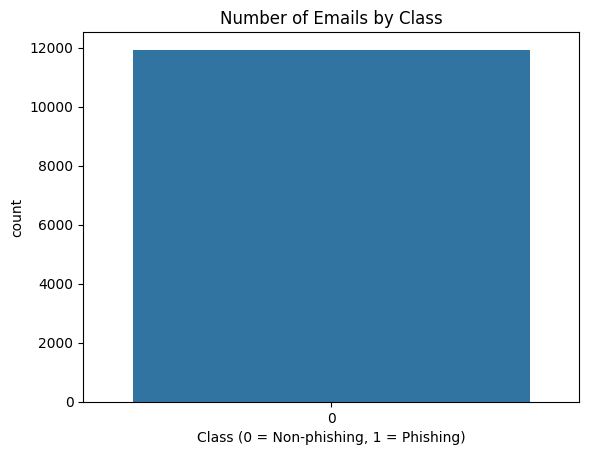

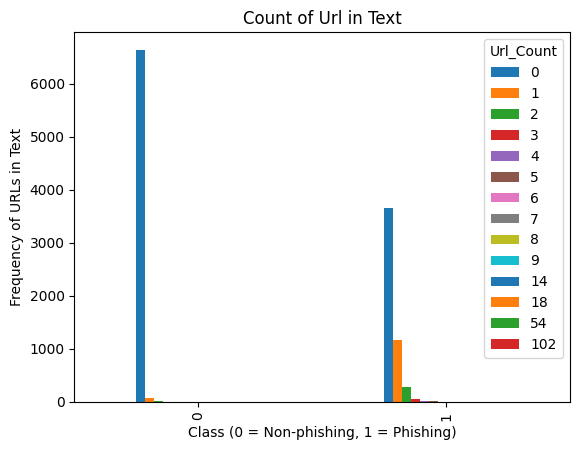

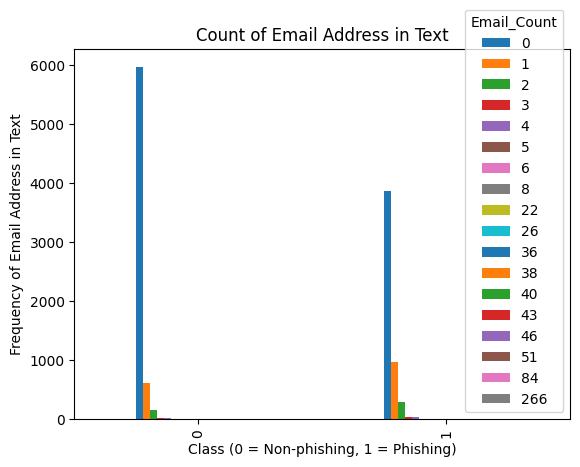

In [10]:
#Plotting graphs to analysing the data
import matplotlib.pyplot as plt
import seaborn as sns

#Number of phishing emails vs how many non-phishing emails
print(df["Class"].value_counts())
sns.countplot(df['Class'])
plt.title('Number of Emails by Class')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')

#Analysing count of Url in text
pd.crosstab(df['Class'],df['Url_Count']).plot(kind='bar')
plt.title('Count of Url in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of URLs in Text')
#There are presence of outliers

#Analysing count of Email in text
pd.crosstab(df['Class'],df['Email_Count']).plot(kind='bar')
plt.title('Count of Email Address in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')
#There are presence of outliers


In [11]:
#Removing outliers (3 standard deviations away from the mean)

#Drop outliers in Url_Count 
range = df['Url_Count'].mean() + df['Url_Count'].std()*3 
df = df.loc[(df["Url_Count"] <= range)]

#Drop outliers in Email_Count 
range = df['Email_Count'].mean() + df['Email_Count'].std()*3 
df = df.loc[(df["Email_Count"] <= range)]



Class
0    6732
1    5135
Name: count, dtype: int64


Text(0, 0.5, 'Frequency of Email Address in Text')

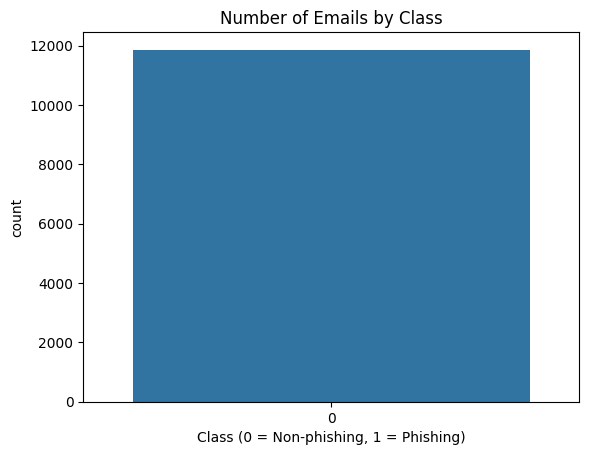

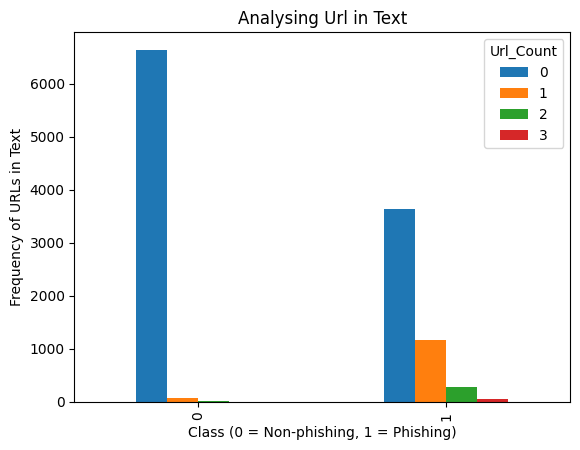

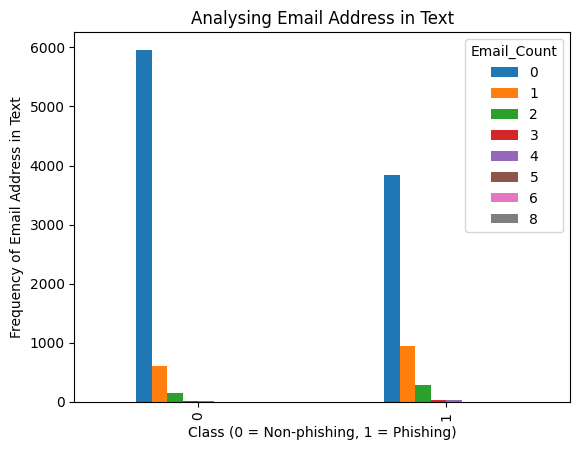

In [12]:
#Plotting the graphs against after removing the outliers
#Number of phishing emails vs how many non-phishing emails
print(df["Class"].value_counts())
sns.countplot(df['Class'])
plt.title('Number of Emails by Class')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')

pd.crosstab(df['Class'],df['Url_Count']).plot(kind='bar')
plt.title('Analysing Url in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of URLs in Text')
#Presence of outliers

pd.crosstab(df['Class'],df['Email_Count']).plot(kind='bar')
plt.title('Analysing Email Address in Text')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')


In [13]:
#Drop outliers in Text_Length
range = df['Text_Length'].mean() + df['Text_Length'].std()*3 
df = df.loc[(df["Text_Length"] <= range)]

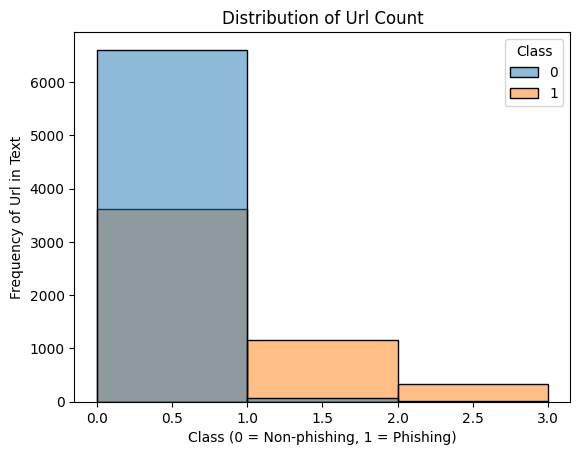

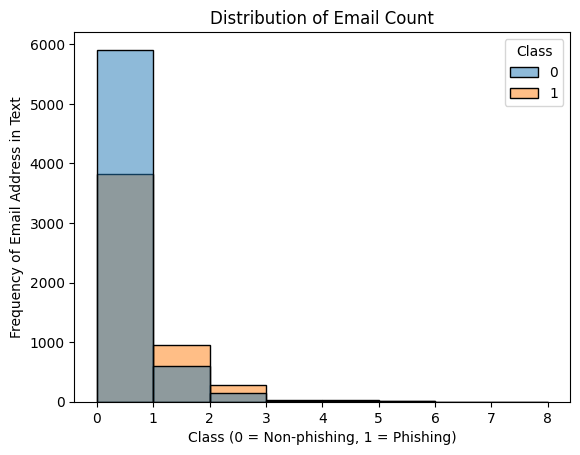

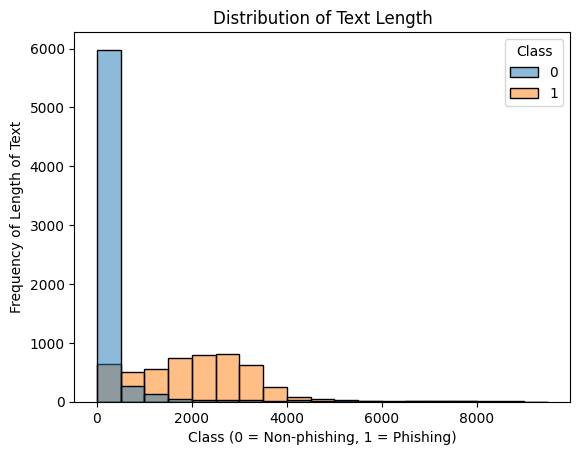

In [14]:
#histograms
#histogram of number of url per emails for both classes 
sns.histplot(df, x="Url_Count", binwidth=1, hue="Class")
plt.title('Distribution of Url Count')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Url in Text')
plt.show()

#histogram on number of email for both classes
sns.histplot(df, x="Email_Count", binwidth=1, hue="Class")
plt.title('Distribution of Email Count')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Email Address in Text')
plt.show()

#histogram on text length per email for both classes
sns.histplot(df, x="Text_Length", binwidth=500, hue="Class")
plt.title('Distribution of Text Length')
plt.xlabel('Class (0 = Non-phishing, 1 = Phishing)')
plt.ylabel('Frequency of Length of Text')
plt.show()

In [18]:
#Removing stop words part 1: Tokenising the text (This code portion takes a while to run)
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

start = time.time()
end = time.time()
df['Text_Tokens'] = df["Text"].apply(lambda x: word_tokenize(x))
print(end - start)
df.head()

[nltk_data] Downloading package stopwords to C:\Users\Lim Yin
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Lim Yin
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0.0


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next..."
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333,"[mr, cheung, puihang, seng, bank, ltddes, voeux, rd, branchcentral, hong, konghong, kong, let, me, start, by, introducing, myself, i, am, mrcheung, pui, director, of, operations, of, the, hang, seng, bank, ltd, i, have, an, urgent, business, suggestion, for, youi, honestly, apologize, and, hope, i, do, not, cause, you, much, embarrassment, by, contacting, you, through, this, means, for, a, transaction, of, this, magnitudebut, this, is, due, to, confidentiality, and, prompt, access, reposed, ..."
4,not a surprising assessment from embassy,0,[],0,[],0,40,"[not, a, surprising, assessment, from, embassy]"


In [19]:
#Removing stop words part 2: Removing stopwords
def remove_stop_words(word_tokens):
  nltk_stop_words = stopwords.words('english')
  custom_stop_words=['.', ',']
  combined_stop_words = nltk_stop_words + custom_stop_words

  filtered_sentence = []
  for w in word_tokens:
    if w not in combined_stop_words:
        filtered_sentence.append(w)
  return(filtered_sentence)
start = time.time()
df['Text_Filtered'] = df['Text_Tokens'].apply(lambda x: remove_stop_words(x))
end = time.time()
print(end - start)
df.head()

2.767205238342285


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make, fortune, clients, situations, help, left, better, option, issue, presenting, case, client, willed, fortune, nextofkin, unfortunate, nextofkin, died, day, st, october, egyptian, airline, passengers, board, confirm, website, published, bbc, world, newswebsitehttpewsbbccoukhiworldamericasstmi, faced, confusion, pass, fortune, toaccording, english, law, fortune, suppos..."
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,1,[http://www.forcetacticalarmy.com],1,[che_pui67@yahoo.com.hk],1,3333,"[mr, cheung, puihang, seng, bank, ltddes, voeux, rd, branchcentral, hong, konghong, kong, let, me, start, by, introducing, myself, i, am, mrcheung, pui, d

In [20]:
#Lemmatize the list of words
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wnl = WordNetLemmatizer()

def lemmatize(s):
     s = [wnl.lemmatize(word) for word in s]
     return s

df['Text_Filtered_Lemmatized'] = df['Text_Filtered'].apply(lambda x: lemmatize(x))
df.head()

[nltk_data] Downloading package wordnet to C:\Users\Lim Yin
[nltk_data]     Shan\AppData\Roaming\nltk_data...


,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m..."
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]"
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make, fortune, clients, situations, help, left, better, option, issue, presenting, case, client, willed, fortune, nextofkin, unfortunate, nextofkin, died, day, st, october, egyptian, airline, passengers, board, confirm, website, published, bbc, world, newswebsitehttpewsbbccoukhiworldamericasstmi, faced, confusion, pass, fortune, toaccording, english, law, fortune, suppos...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, u, executor, will, possible, may, tempted, make, fortune, client, situation, help, left, better, opt

## EMAIL TEXT MODELING & ANALYSIS

In [23]:
#Analysing the word counts for emails in general
from sklearn.feature_extraction.text import CountVectorizer

#Join the word tokens into strings
df['Text_Filtered_String'] = df['Text_Filtered_Lemmatized'].apply(lambda x: ' '.join(x))

cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
total_counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Total_Occurrences': occ})
total_counts_df.sort_values(by=['Total_Occurrences'], ascending = False,inplace=True)
total_counts_df.head()

,Term,Total_Occurrences
1114,father,2538
764,de,1943
811,deposit,1894
95,africa,1781
1180,foreigner,1769


In [25]:
#Analysing the word counts for phishing emails using count vectorizer
cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
phishing_counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Phish_Occurrences': occ})
phishing_counts_df.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
phishing_counts_df.head()

,Term,Phish_Occurrences
1133,de,1943
830,client,1054
620,box,922
416,attorney,857
1731,firm,835


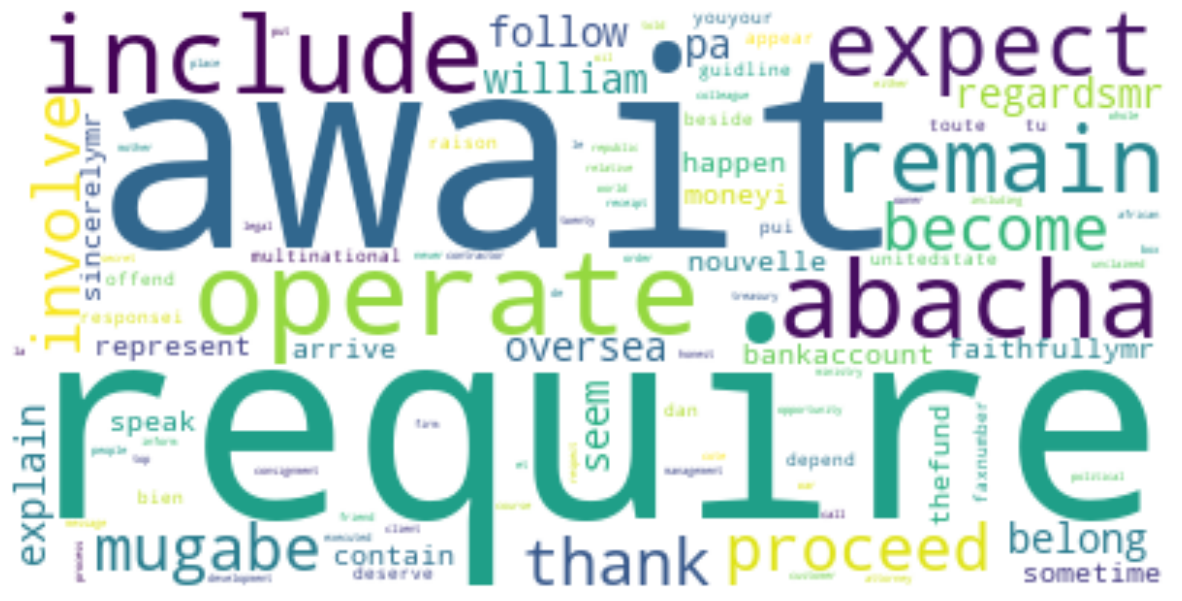

In [27]:
#Creating a word cloud to visualise the term distribution for Phishing emails (Count Vectorizer)
from wordcloud import WordCloud
phishing_corpus = ''
for i in phishing_counts_df['Term']:
  phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
#Finding emails with "de" in it
df["Temporary_Column"] = df['Text_Filtered_String'].apply(lambda x: re.findall('\sde\s',x))
print(df.sort_values('Temporary_Column',ascending=False).head(10))
df.drop(columns = 'Temporary_Column',inplace = True)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  \
1735   rci mon ange brmon nom est mona khalil je suis de brnationalite algerienne et je vis en irak je suis une femmeeeje suis ala recherche dune personne capable de maimer et de vivre avec moievraiment une amitie basee sur le respect mutuelle et une confiancetotalecar une vie de couple sans le respect et la confiance ne nulle parteje suis une femme independante et tendreeppnbsptout ce que je voulais obtenirde ma carriere est atteinte maintenant je veux le calme la chaleur et la consta

In [30]:
#Analysing the word counts for phishing emails using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer()
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==1]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
phishing_counts_df_idf = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Phish_Occurrences': occ})

# TFIDF WEIGHT
phishing_counts_df_idf.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
phishing_counts_df_idf.head()

,Term,Phish_Occurrences
39125,money,199.907183
6870,bank,190.622113
693,account,183.546697
26085,fund,162.706706
41773,next,117.201325


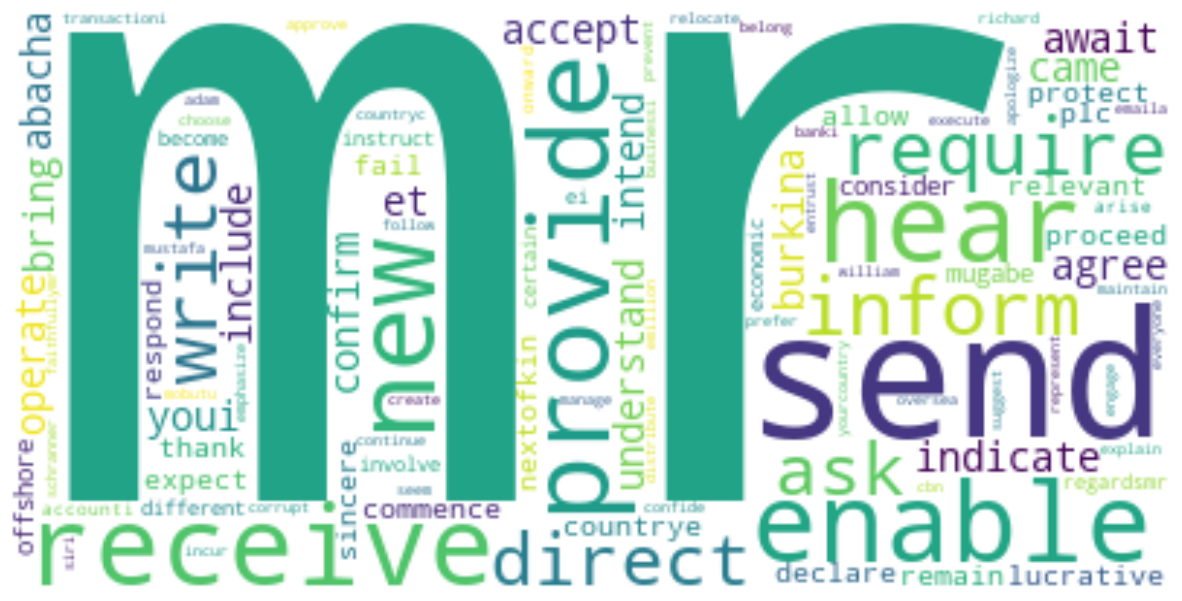

In [31]:
#Creating a word cloud to visualise the term distribution for Phishing emails (Tfidf Vectorizer)
phishing_corpus = ''
for i in phishing_counts_df_idf['Term']:
  phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
#Analysing the word counts for non-phishing emails using count vectorizer
cvec = CountVectorizer(min_df=.0025, max_df=.1)
cvec.fit(df[df["Class"]==0]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==0]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
counts_df.sort_values(by=['Occurrences'], ascending = False,inplace=True)
counts_df.head()

,Term,Occurrences
1045,pm,1691
1338,state,1202
1237,secretary,1107
957,office,928
1571,would,916


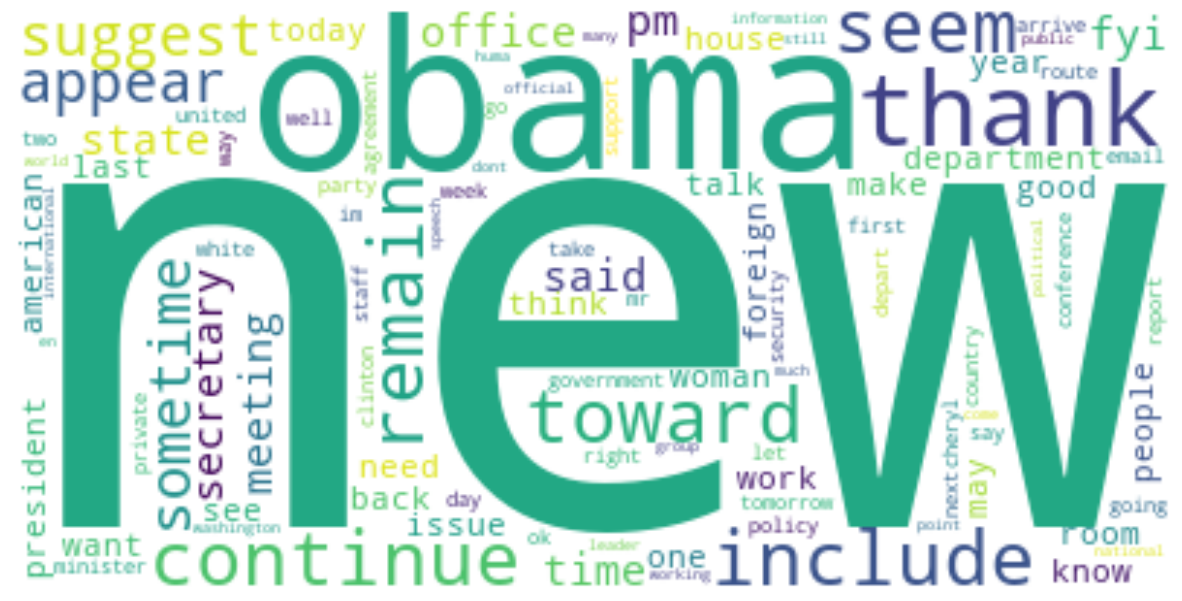

In [33]:
#Creating a word cloud to visual the term distribution for non-phishing emails
non_phishing_corpus = ''
for i in counts_df['Term']:
  non_phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(non_phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
#Analysing the word counts for non-phishing emails using tfidf vectorizer
cvec = TfidfVectorizer()
cvec.fit(df[df["Class"]==1]["Text_Filtered_String"])
cvec_counts = cvec.transform(df[df["Class"]==0]["Text_Filtered_String"])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df_idf = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Phish_Occurrences': occ})

# TFIDF WEIGHT
counts_df_idf.sort_values(by=['Phish_Occurrences'], ascending = False,inplace=True)
counts_df_idf.head()

,Term,Phish_Occurrences
10992,call,212.985684
43901,ok,206.209983
47057,pm,139.308637
60352,tomorrow,136.498073
53254,see,123.139936


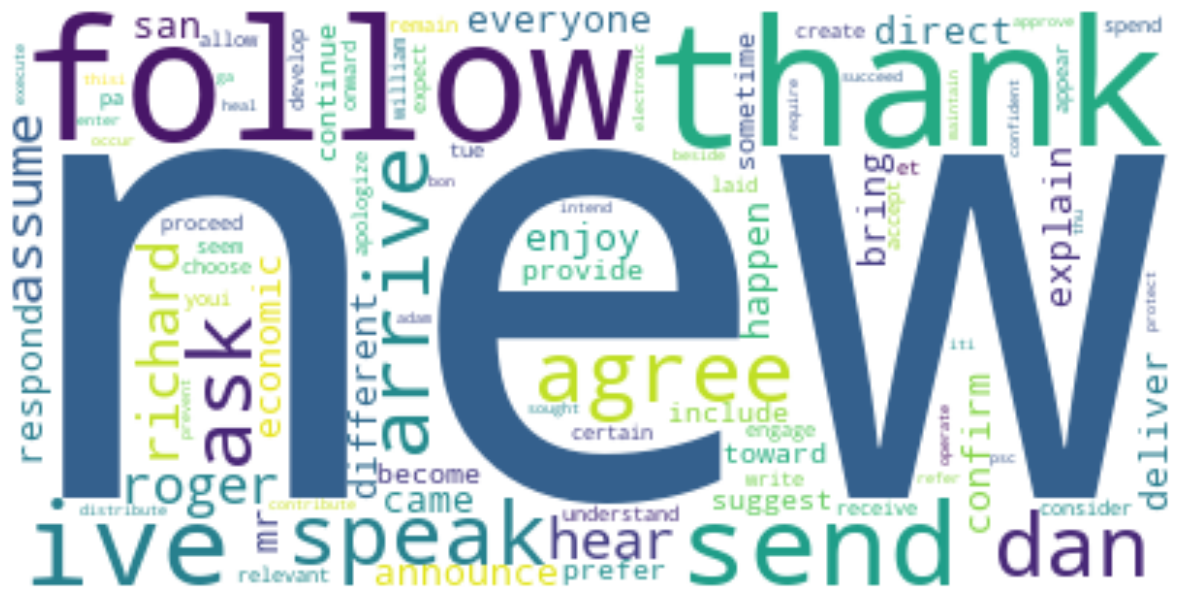

In [36]:
#Creating a word cloud to visual the term distribution for non-phishing emails
non_phishing_corpus = ''
for i in counts_df_idf['Term']:
  non_phishing_corpus += i + ' '
wordcloud = WordCloud(max_font_size=300, max_words=100, background_color="white").generate(non_phishing_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
df['Url_Present'] = df["Url_Count"].apply(lambda x: 1 if x>0 else 0)

In [38]:
#Split dataset to test and train data

from sklearn.model_selection import train_test_split
X = df["Text_Filtered_String"]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

accuracy: 97.0%
precision: 95.0%
recall: 97.0%
f1_score: 96.0%


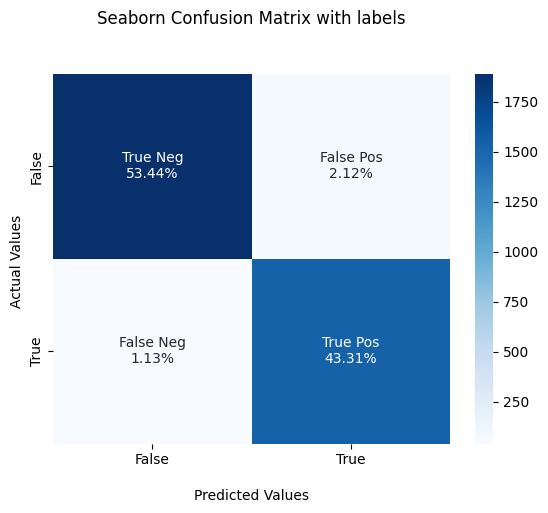

In [39]:
#Model 1 - Multinomial Naive Bayes (With TfidfVectorizer)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
X_train_idf = vectorizer.fit_transform(X_train)
nb = MultinomialNB()
nb.fit(X_train_idf,y_train)
X_test_idf = vectorizer.transform(X_test)
y_pred = nb.predict(X_test_idf)

metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [42]:
# Model 1 - Get the feature importance of Model 1 
# https://stackoverflow.com/questions/29867367/sklearn-multinomial-nb-most-informative-features

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names_out()
    coefs_with_fns = sorted(zip(clf.feature_log_prob_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

show_most_informative_features(vectorizer, nb, n=20)

	-11.4326	aa             		-5.6215	fyi            
	-11.4326	aaaccdbdacfd   		-6.6003	ok             
	-11.4326	aaadecfbbefdc  		-6.6878	call           
	-11.4326	aaayours       		-7.2065	pm             
	-11.4326	aabidjan       		-7.2360	see            
	-11.4326	aac            		-7.2571	yes            
	-11.4326	aaceebceee     		-7.3063	thx            
	-11.4326	aaclocated     		-7.3938	pls            
	-11.4326	aadear         		-7.4248	print          
	-11.4326	aae            		-7.4730	talk           
	-11.4326	aag            		-7.4870	tomorrow       
	-11.4326	aakidayahoofra 		-7.6017	im             
	-11.4326	aallensmithfyahooeca		-7.6594	cheryl         
	-11.4326	aam            		-7.6748	get            
	-11.4326	aaofflllolfithrws		-7.6938	secretary      
	-11.4326	aasuring       		-7.6961	know           
	-11.4326	aay            		-7.7074	pi             
	-11.4326	ab             		-7.7191	think          
	-11.4326	aba            		-7.8125	today          
	-11.4326	ababa         

accuracy: 96.0%
precision: 100.0%
recall: 92.0%
f1_score: 96.0%


Text(0, 0.5, 'Coefficient Value')

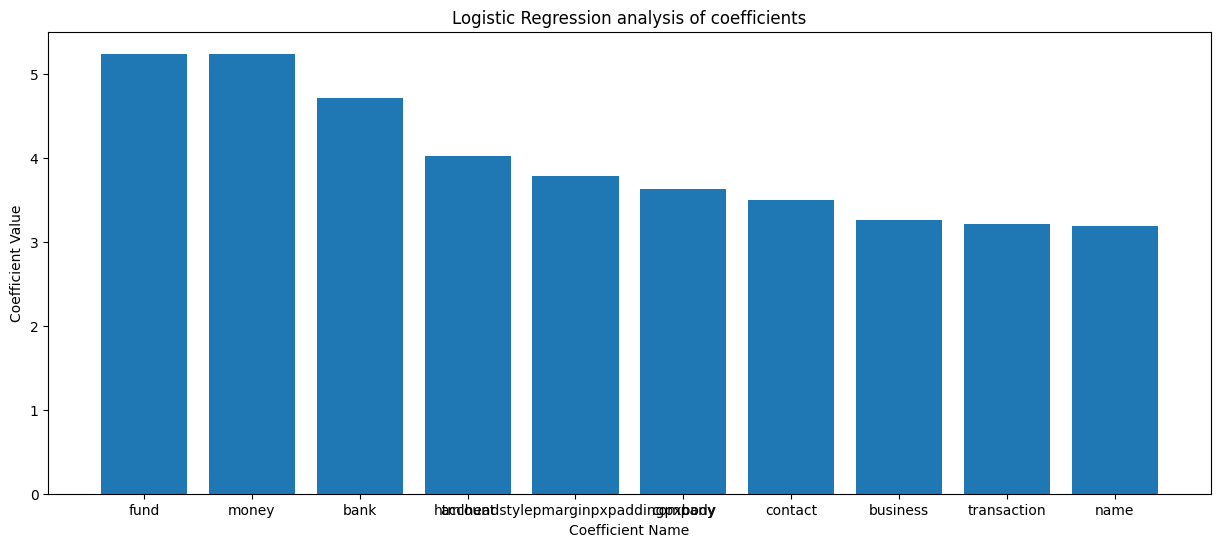

In [43]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
lr = LogisticRegression().fit(X_train_idf, y_train)
y_pred = lr.predict(X_test_idf)
metrics(y_test, y_pred)
lr_df = pd.DataFrame(lr.coef_,columns=vectorizer.get_feature_names_out())
lr_df.sort_values(by = 0, axis=1, ascending = False,inplace=True)
figure(figsize = (15, 6))
plt.bar(list(lr_df.columns[0:10]),lr_df.iloc[0,0:10])
plt.title('Logistic Regression analysis of coefficients')
plt.xlabel('Coefficient Name')
plt.ylabel('Coefficient Value')

accuracy: 96.0%
precision: 100.0%
recall: 92.0%
f1_score: 96.0%


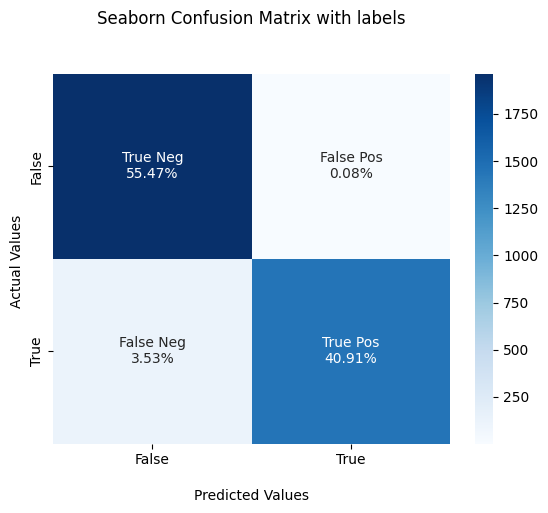

In [44]:
#Logistic regression continue
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

accuracy: 98.0%
precision: 100.0%
recall: 96.0%
f1_score: 98.0%


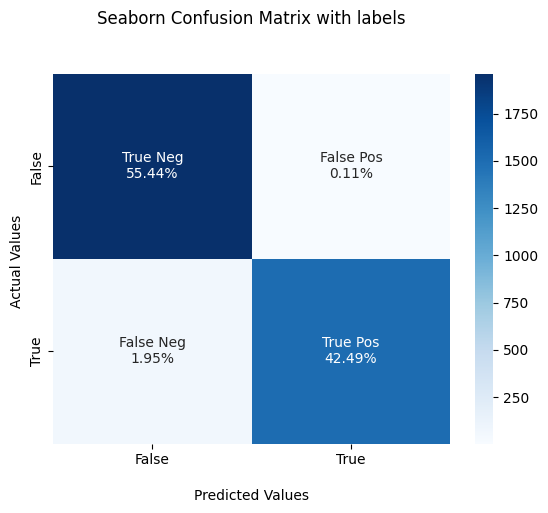

In [45]:
#Model 3 - SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_idf, y_train)
y_pred = clf.predict(X_test_idf)
y_pred_model_svm = clf.predict(X_test_idf)
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1965
           1       1.00      0.96      0.98      1572

    accuracy                           0.98      3537
   macro avg       0.98      0.98      0.98      3537
weighted avg       0.98      0.98      0.98      3537



accuracy: 96.0%
precision: 96.0%
recall: 94.0%
f1_score: 95.0%


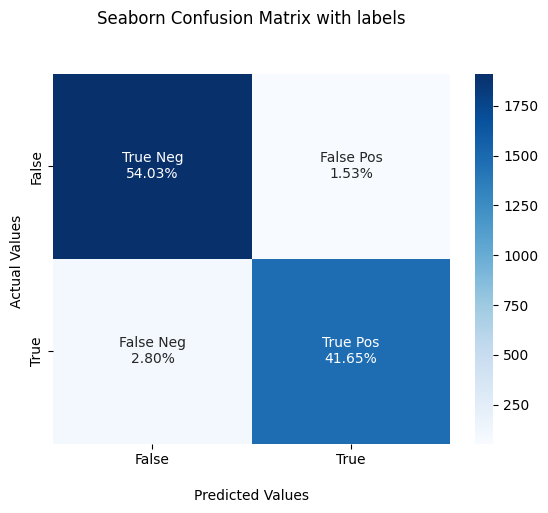

In [47]:
#Model 4 - Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_idf,y_train)
y_pred = dt.predict(X_test_idf)
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Text(0, 0.5, 'Feature Importance')

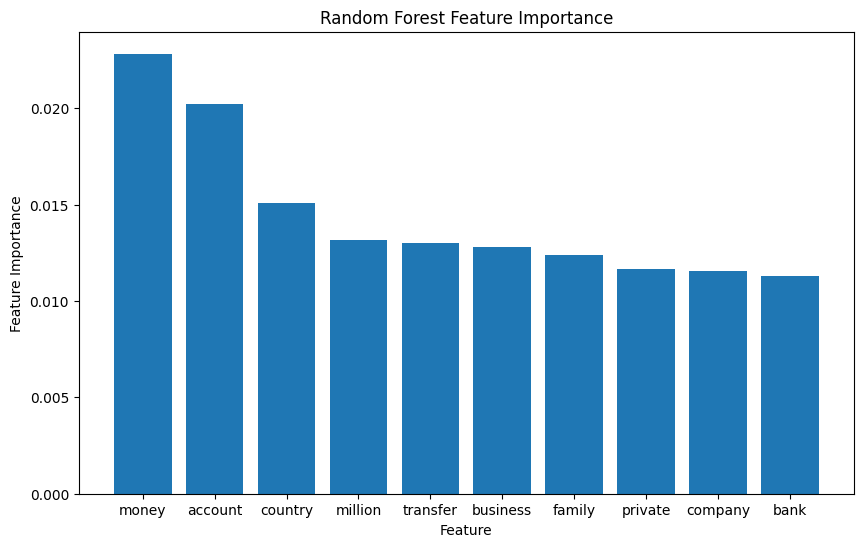

In [48]:
#Model 5 - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=100, random_state=0)
rf.fit(X_train_idf, y_train)
y_pred = rf.predict(X_test_idf)
print(rf.get_params())

rf_df = pd.DataFrame(rf.feature_importances_,vectorizer.get_feature_names_out(),columns = ['Word'])
rf_df.sort_values(by='Word',inplace=True, ascending=False)
rf_df.head()
figure(figsize = (10, 6))
plt.bar(rf_df.index[0:10],rf_df['Word'][0:10])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

accuracy: 96.0%
precision: 99.0%
recall: 91.0%
f1_score: 95.0%


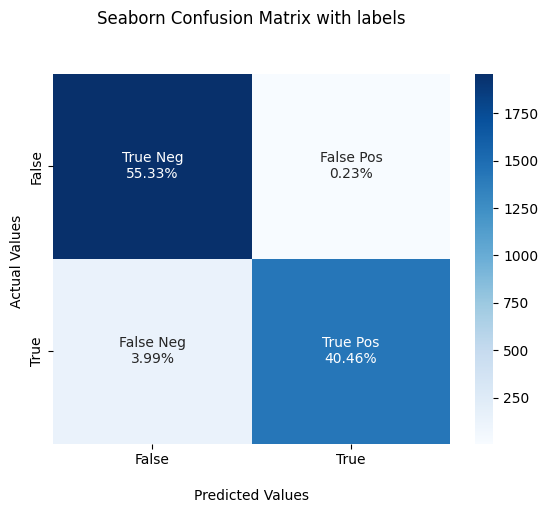

In [49]:
metrics(y_test,y_pred)
plot_cm(y_test,y_pred)

In [50]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=100, random_state=0)>

In [ ]:
# #Model 6 - Random Forest with parameter tuning ()
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# # Minimum number of samples required to split a node
# min_samples_split = [10,50, 100, 300,500]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [10,50, 100,300,500]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rf = RandomForestClassifier(random_state=0)             
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=0, n_jobs = -1)
# start = time.time()
# rf_random.fit(X_train_idf, y_train)
# end = time.time()
# print(end - start)

In [ ]:
# #Model 6 - Continue
# print(rf_random.best_params_)
# y_pred = rf_random.best_estimator_.predict(X_test_idf)
# print('accuracy: %s' % accuracy_score(y_test, y_pred))
# print('\n')
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [70,80, 90, 100],
#     'max_features': ['auto'],
#     'min_samples_leaf': [10, 11, 12],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [200, 267, 300, 330]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# start = time.time()
# rf_grid.fit(X_train_idf,y_train)
# end = time.time()
# print(end - start)

In [ ]:
# rf_grid.best_params_

In [ ]:
# y_pred = rf_grid.best_estimator_.predict(X_test_idf)
# print('accuracy: %s' % accuracy_score(y_test, y_pred))
# print('\n')
# print(classification_report(y_test, y_pred))

In [ ]:
#Save rf model in a file to prevent running the codes again
# import pickle
# with open('model_pkl', 'wb') as files:
#   pickle.dump(rf_grid.best_estimator_, files)

# with open('model_pkl' , 'rb') as f:
#     rf_grid_best = pickle.load(f)

accuracy: 97.0%
precision: 99.0%
recall: 93.0%
f1_score: 96.0%


Text(0, 0.5, 'Feature Importance')

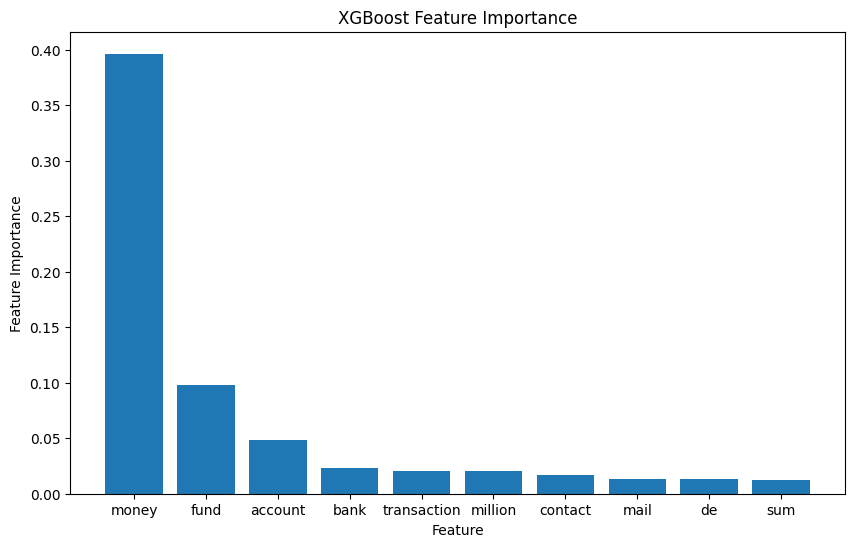

In [52]:
#Model 7 - XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_idf, y_train)
y_pred = xg.predict(X_test_idf)
metrics(y_test,y_pred)
xg_df = pd.DataFrame(xg.feature_importances_,vectorizer.get_feature_names_out(),columns = ['Word'])
xg_df.sort_values(by='Word',inplace=True, ascending=False)
figure(figsize = (10, 6))
plt.bar(xg_df.index[0:10],xg_df['Word'][0:10])
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

In [53]:
# X_train_idf, y_train, X_test_idf, y_test

In [54]:
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized,Text_Filtered_String,Url_Present
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m...",supply quality china exclusive dimension unbeatable pricedear sir pleased inform one china largest export import stone companywanlistone group group subsidiary specialize quarrying processing sale dimension stone slab tile dimension stone product building material sector specialty marketse group operation based xiamen south china largest export import business portal china wanlistone owns operates various natural stone deposit square meter country addition quarry wanlistone fully automated p...,0
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]",sidlet know thx,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, benefit, us, executor, wills, possible, may, tempted, make

In [55]:
traintextlist = []
trainclasslist = []
testtextlist = []
testclasslist = []
i = 0

for index, row in df.iterrows():
  # split 30%
    if i < len(df)*0.7:
        traintextlist.append(row['Text'])
        trainclasslist.append(row['Class'])
    else:
        testtextlist.append(row['Text'])
        testclasslist.append(row['Class'])
    i += 1
    
print(len(traintextlist), len(testtextlist))

8251 3536


In [56]:
print(len(traintextlist), len(trainclasslist))
print(len(testtextlist), len(testclasslist))

8251 8251
3536 3536


In [63]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D
import numpy as np
from keras.preprocessing import text
import wandb
from wandb.keras import WandbCallback

wandb.init()
config = wandb.config
# API_key = 119555c0966edb98c12a2d82e1229a61fc4ba72e

In [64]:
config.vocab_size = 2000
config.maxlen = 1000
config.batch_size = 200
config.embedding_dims = 10
config.filters = 16
config.kernel_size = 3
config.hidden_dims = 250
config.epochs = 30

In [65]:
text.Tokenizer

keras.src.preprocessing.text.Tokenizer

In [66]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(traintextlist)
X_train = tokenizer.texts_to_matrix(traintextlist)
X_test = tokenizer.texts_to_matrix(testtextlist)
print(len(X_train), len(X_test))

8251 3536


In [67]:
X_train = sequence.pad_sequences(X_train, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
X_test = sequence.pad_sequences(X_test, maxlen = config.maxlen) 
print(len(X_train), len(X_test))

8251 3536


In [68]:
y_train = np.array(trainclasslist)
y_test = np.array(testclasslist)
print(len(y_train), len(y_test))

8251 3536


In [69]:
model = Sequential()
model.add(Embedding(config.vocab_size, config.embedding_dims, input_length = config.maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(config.filters, config.kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(config.filters, config.kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # class 1 or 0

model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
41/42 [============================>.] - ETA: 0s - loss: 0.6862 - accuracy: 0.5601

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 4s 82ms/step - loss: 0.6862 - accuracy: 0.5604 - val_loss: 0.6844 - val_accuracy: 0.5713
Epoch 2/30
41/42 [============================>.] - ETA: 0s - loss: 0.6751 - accuracy: 0.5784

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 72ms/step - loss: 0.6750 - accuracy: 0.5796 - val_loss: 0.6305 - val_accuracy: 0.6247
Epoch 3/30
41/42 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8040

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.5053 - accuracy: 0.8041 - val_loss: 0.4313 - val_accuracy: 0.8538
Epoch 4/30
42/42 [==============================] - ETA: 0s - loss: 0.3770 - accuracy: 0.8667

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 72ms/step - loss: 0.3770 - accuracy: 0.8667 - val_loss: 0.3353 - val_accuracy: 0.8773
Epoch 5/30
42/42 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.8958

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.2908 - accuracy: 0.8958 - val_loss: 0.2699 - val_accuracy: 0.9016
Epoch 6/30
41/42 [============================>.] - ETA: 0s - loss: 0.2467 - accuracy: 0.9120

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 71ms/step - loss: 0.2464 - accuracy: 0.9120 - val_loss: 0.2459 - val_accuracy: 0.9095
Epoch 7/30
42/42 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.9154

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 72ms/step - loss: 0.2252 - accuracy: 0.9154 - val_loss: 0.2339 - val_accuracy: 0.9186
Epoch 8/30
42/42 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9223

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.2120 - accuracy: 0.9223 - val_loss: 0.2226 - val_accuracy: 0.9188
Epoch 9/30
41/42 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9267

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.2023 - accuracy: 0.9264 - val_loss: 0.2210 - val_accuracy: 0.9273
Epoch 10/30
42/42 [==============================] - ETA: 0s - loss: 0.1951 - accuracy: 0.9290

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 71ms/step - loss: 0.1951 - accuracy: 0.9290 - val_loss: 0.2134 - val_accuracy: 0.9268
Epoch 11/30
42/42 [==============================] - 2s 53ms/step - loss: 0.1880 - accuracy: 0.9320 - val_loss: 0.2166 - val_accuracy: 0.9287
Epoch 12/30
41/42 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9349

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.1824 - accuracy: 0.9353 - val_loss: 0.2004 - val_accuracy: 0.9293
Epoch 13/30
41/42 [============================>.] - ETA: 0s - loss: 0.1741 - accuracy: 0.9394

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.1736 - accuracy: 0.9396 - val_loss: 0.1973 - val_accuracy: 0.9327
Epoch 14/30
41/42 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9409

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 69ms/step - loss: 0.1673 - accuracy: 0.9410 - val_loss: 0.1936 - val_accuracy: 0.9344
Epoch 15/30
41/42 [============================>.] - ETA: 0s - loss: 0.1592 - accuracy: 0.9440

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 68ms/step - loss: 0.1597 - accuracy: 0.9436 - val_loss: 0.1872 - val_accuracy: 0.9347
Epoch 16/30
42/42 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9457

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 72ms/step - loss: 0.1568 - accuracy: 0.9457 - val_loss: 0.1827 - val_accuracy: 0.9375
Epoch 17/30
41/42 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9494

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 74ms/step - loss: 0.1477 - accuracy: 0.9491 - val_loss: 0.1804 - val_accuracy: 0.9386
Epoch 18/30
41/42 [============================>.] - ETA: 0s - loss: 0.1431 - accuracy: 0.9511

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 83ms/step - loss: 0.1431 - accuracy: 0.9512 - val_loss: 0.1768 - val_accuracy: 0.9400
Epoch 19/30
41/42 [============================>.] - ETA: 0s - loss: 0.1412 - accuracy: 0.9499

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 71ms/step - loss: 0.1415 - accuracy: 0.9498 - val_loss: 0.1749 - val_accuracy: 0.9403
Epoch 20/30
42/42 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9531

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 69ms/step - loss: 0.1364 - accuracy: 0.9531 - val_loss: 0.1744 - val_accuracy: 0.9409
Epoch 21/30
41/42 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9551

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 69ms/step - loss: 0.1324 - accuracy: 0.9552 - val_loss: 0.1704 - val_accuracy: 0.9417
Epoch 22/30
41/42 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9555

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.1316 - accuracy: 0.9555 - val_loss: 0.1669 - val_accuracy: 0.9417
Epoch 23/30
41/42 [============================>.] - ETA: 0s - loss: 0.1291 - accuracy: 0.9561

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.1294 - accuracy: 0.9560 - val_loss: 0.1665 - val_accuracy: 0.9449
Epoch 24/30
42/42 [==============================] - 2s 57ms/step - loss: 0.1251 - accuracy: 0.9582 - val_loss: 0.1693 - val_accuracy: 0.9434
Epoch 25/30
41/42 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.9589

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 71ms/step - loss: 0.1239 - accuracy: 0.9590 - val_loss: 0.1643 - val_accuracy: 0.9443
Epoch 26/30
42/42 [==============================] - 2s 55ms/step - loss: 0.1222 - accuracy: 0.9587 - val_loss: 0.1645 - val_accuracy: 0.9457
Epoch 27/30
42/42 [==============================] - 2s 52ms/step - loss: 0.1202 - accuracy: 0.9589 - val_loss: 0.1669 - val_accuracy: 0.9451
Epoch 28/30
42/42 [==============================] - 2s 53ms/step - loss: 0.1193 - accuracy: 0.9609 - val_loss: 0.1701 - val_accuracy: 0.9457
Epoch 29/30
41/42 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9637

C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Lim Yin Shan\Documents\GitHub\phishing-detection\wandb\run-20230721_043522-d20cc3hq\files\model-best)... Done. 0.0s


42/42 [==============================] - 3s 70ms/step - loss: 0.1183 - accuracy: 0.9634 - val_loss: 0.1606 - val_accuracy: 0.9446
Epoch 30/30
42/42 [==============================] - 2s 53ms/step - loss: 0.1164 - accuracy: 0.9612 - val_loss: 0.1662 - val_accuracy: 0.9446


In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 10)          20000     
                                                                 
 dropout (Dropout)           (None, 1000, 10)          0         
                                                                 
 conv1d (Conv1D)             (None, 998, 16)           496       
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 16)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 16)           784       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 248, 16)           0         
 g1D)                                                   

## SENTIMENT ANALYSIS

In [71]:
#TextBlob Sentiment Analysis
from textblob import TextBlob

def blob_polarity(text):
    return TextBlob(text).sentiment.polarity

def blob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [72]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
#Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
#Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
from textblob import TextBlob

df['polarity'] = df['Text'].apply(blob_polarity)
df['subjectivity'] = df['Text'].apply(blob_subjectivity)
df.head()

,Text,Class,Url,Url_Count,Email,Email_Count,Text_Length,Text_Tokens,Text_Filtered,Text_Filtered_Lemmatized,Text_Filtered_String,Url_Present,polarity,subjectivity
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,1,[],0,[],0,1059,"[supply, quality, chinas, exclusive, dimensions, at, unbeatable, pricedear, sir, we, are, pleased, to, inform, you, as, one, of, chinas, largest, export, import, stone, companywanlistone, group, the, group, its, subsidiaries, specialize, in, the, quarrying, processing, and, sales, of, dimension, stone, slab, and, tiles, and, dimension, stone, products, for, the, building, materials, sector, and, specialty, marketse, the, group, operations, are, based, in, xiamen, south, of, china, which, is,...","[supply, quality, chinas, exclusive, dimensions, unbeatable, pricedear, sir, pleased, inform, one, chinas, largest, export, import, stone, companywanlistone, group, group, subsidiaries, specialize, quarrying, processing, sales, dimension, stone, slab, tiles, dimension, stone, products, building, materials, sector, specialty, marketse, group, operations, based, xiamen, south, china, largest, export, import, business, portals, china, wanlistone, owns, operates, various, natural, stone, deposit...","[supply, quality, china, exclusive, dimension, unbeatable, pricedear, sir, pleased, inform, one, china, largest, export, import, stone, companywanlistone, group, group, subsidiary, specialize, quarrying, processing, sale, dimension, stone, slab, tile, dimension, stone, product, building, material, sector, specialty, marketse, group, operation, based, xiamen, south, china, largest, export, import, business, portal, china, wanlistone, owns, operates, various, natural, stone, deposit, square, m...",supply quality china exclusive dimension unbeatable pricedear sir pleased inform one china largest export import stone companywanlistone group group subsidiary specialize quarrying processing sale dimension stone slab tile dimension stone product building material sector specialty marketse group operation based xiamen south china largest export import business portal china wanlistone owns operates various natural stone deposit square meter country addition quarry wanlistone fully automated p...,0,0.095688,0.413170
1,over sidlet me know thx,0,[],0,[],0,23,"[over, sidlet, me, know, thx]","[sidlet, know, thx]","[sidlet, know, thx]",sidlet know thx,0,0.000000,0.000000
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,1,[http:/ews.bbc.co.uk/1/hi/world/americas/502503.stm.i],1,[],0,2091,"[dear, friendgreetings, to, youi, wish, to, accost, you, with, a, request, that, would, be, of, immense, benefit, to, both, of, us, being, an, executor, of, wills, it, is, possible, that, we, may, be, tempted, to, make, fortune, out, of, our, clients, situations, when, we, can, not, help, it, or, left, with, no, better, option, the, issue, i, am, presenting, to, you, is, a, case, of, my, client, who, willed, a, fortune, to, his, nextofkin, it, was, most, unfortunate, that, he, and, his, next...","[dear, friendgreetings, youi, wish, accost, request, would, immense, 

In [73]:
polarity_df=df[['Text','polarity','Class']]
polarity_df.head()

,Text,polarity,Class
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,0.095688,1
1,over sidlet me know thx,0.000000,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,0.062850,1
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,0.131071,1
4,not a surprising assessment from embassy,-0.350000,0


In [74]:
sorted_polarity = polarity_df.sort_values(by=['polarity'], ascending=True)
sorted_polarity.head()

,Text,polarity,Class
5541,i am counting on you looking to hearing from youthanks and god bless youmrs fadilah fahad \t\t\t yahoo mail use photomail to share photos without annoying attachments,-0.800,1
2327,thx you should get a copy of alis data base for our use,-0.800,0
5584,im in bad cell area,-0.700,0
10552,h hrodclintonemailcommonday april pmabedinhstategov jilotylcstategov russorvstategovre bad newspis send a letter and add her to call list i called yesterday and spoke w her soninlaw,-0.700,0
1278,boy are they mad about our ambassador,-0.625,0


In [75]:
sorted_polarity = polarity_df.sort_values(by=['polarity'], ascending=False)
sorted_polarity.head(10)

,Text,polarity,Class
11034,i hope all the clintons had a wonderful xmasdb,1.0,0
57,best regards ron sinclear ronsinclearnetscapenet,1.0,1
4725,briefed a group of wonks at brookings tonite superbly impressive persuasive lowkey mastery confidencecongrats on having her on your team leading these negs,1.0,0
1478,best regardsjoseph aburime bcaeffccedea,1.0,1
4009,can you talk what time is best,1.0,0
9025,here is the best spelling ive seen of our qatari friends namesheikha mozah bint nasser almissned,1.0,0
6188,dont forget the consolidated report of the sarkozy mtg one of the alltime best,1.0,0
7053,best regardsdrdaniel ibecivil servantfederal ministry ofpetroleum and mineralresources,1.0,1
9839,release inpart bi spoke with laura yesterday re folks you mentioned her is person she ans jose thought best,1.0,0
11538,best regards ron sinclear ronsinclearnetscapenet,1.0,1


In [76]:
subjectivity_df=df[['Text','subjectivity','Class']]
subjectivity_df.head()

,Text,subjectivity,Class
0,supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty marketse the group operations are based in xiamen south of china which is the largest export and import business portals in china where wan...,0.413170,1
1,over sidlet me know thx,0.000000,0
2,dear friendgreetings to youi wish to accost you with a request that would be of immense benefit to both of us being an executor of wills it is possible that we may be tempted to make fortune out of our clients situations when we cannot help it or left with no better option the issue i am presenting to you is a case of my client who willed a fortune to his nextofkin it was most unfortunate that he and his nextofkin died on the same day the st october in an egyptian airline with other passen...,0.367444,1
3,mr cheung puihang seng bank ltddes voeux rd branchcentral hong konghong kong let me start by introducing myself i am mrcheung pui director of operations of the hang seng bank ltd i have an urgent business suggestion for youi honestly apologize and hope i do not cause you much embarrassment by contacting you through this means for a transaction of this magnitudebut this is due to confidentiality and prompt access reposed on this mediumfurthermoredue to this issue on my hands nowit became nece...,0.445476,1
4,not a surprising assessment from embassy,0.500000,0


In [77]:
sorted_subjectivity = subjectivity_df.sort_values(by=['subjectivity'], ascending=True)
sorted_subjectivity.head(10)

,Text,subjectivity,Class
3469,yes thats the plan,0.0,0
8223,h hrodclintonemailcomsunday january amhuma abedinsullivanjjstategovre yang,0.0,0
3851,htmlheadstylepmarginpxpaddingpxbody,0.0,1
3850,allsee below for appreciation for all your efforts congrats and thanksplease pass along to whomever i missedcdm,0.0,0
3849,vujveveiebvelptlmgtjhqujwkfusuockloienptkpvtknusuoifdjveggvehfielovevstkfusuoquwgtuorvrbulkgrlvorapxtjmrcbcquliezbqqtrkloreloryamifnqrunjquwgrfvusuvtiegrkldrqpequtbuiwguvorudbtckvevmoiagkziymsamtgzmzeckvtywlsoibyzxzkbvnbgfzqgthdgftywlslmnvbqokubfqlbtcbevvrjrvmgukvgrvjftknfcgoqklvotyxqkygtetmdutmzcxkiokkippukrfuklorybdtuukfdvesogpesvbmtbveldiejpwcanuthcgpezwfyiejlbmvmawnpyxjlaokssbhbsbszxyuiezylibuagtyxmgrgzxhcywgysbzzwpbigcrhzmygdlacbagugvybgqgqmfuaybmywnigzpbmrpbmcgjibzcgvjawfsigrdgllcybvzm...,0.0,1
3848,anything else going on,0.0,0
3846,ckfzcfsywywxhawtbqoktxkgbmftzsbpcybbbwluysbiywuywggsgfbgvizxjnigzybgqwlcmljysgssbhbsbagugcvydmlawnckrhdwdodgvyigmierylibhbmqgtxjziehhdgxlymvyzybaggzgllzcbhcybhihjlcvsdcbvzibwbgfuzsbjcmfzacbvziakqwxhcthiefpcmxpbmvziezsawdodcaynjegdhpyggyjhchlzcbvbibkywyxjidmxidiwmdauieigzhbwlseqpjbzxjzwqgdggsxnsywgawgmtkocgvhlbibtesbsyxrlifbhcmvudcbzxjligfsaxzllcbtesbmyxrozxikzgvwbnpdgvkihrozsbzdwgbykociepbgxpbgkgvpzhigpbgxpbgzmlzsbodwkcmvkihrobvzywkcluuuygrgsbgfycykgdlacbjbnrlcmhdglvbmfsierpcgxvbwfawmgcvydml...,0.0,1
11048,i think we have to mentionb,0.0,0
11051,anticipating to hear from you soonthanks and god bless youbest regardsmrshilda tomson,0.0,1
8226,can i see mitchell at instead of also what happened to mccrystal mtg,0.0,0


In [78]:
sorted_subjectivity = subjectivity_df.sort_values(by=['subjectivity','Class'], ascending=[False,False])

sorted_subjectivity.head(10)

,Text,subjectivity,Class
896,republique de cote divoireabidjanrue ave plateautres chercette lettre va sfbrement vous paraeetre surprenante je vous prie neanmoin de bien vouloir luiaccorder un grand intereat et de la prendre au serieux avant tout permettez nous de nous presenter aupres de vous je me nomme miss halija amed et jai ansjai perdu mes parents depuis le debut de la guerre que connait notre pays engendre par des rebelleset depuis nous traversons une periode assez difficilemon pere a ete tue dans cette sale guer...,1.0,1
1001,this message contains confidential information and is intended only forspecified addressee if you are not the named addressee you should not disseminatedistribute or copy this email the sender therefore does not accept liabilityfor any errors or omissions in the contents of this message which ariseas a result of email transmission please note that we reserve the rightto monitor and read any emails sent and received under the telecommunicationslawful business practice interception of communic...,1.0,1
2311,committees representative whose name appears below we wait in anticipation of your fullest cooperationyours faithfullyben maluleke engrdepartment of minerals and energyrepublic of south africaget the ultimate realtime chat experience msn messenger httpmessengermsncoza,1.0,1
2664,ahoocamimimegyahoocaaa hrefdmailtomimimegyahoocaadiv divnbspdiv divnbspdiv divnbspdiv divnbspdivdivdivdivpbrdo you yahoobren finir avec le spam yahoo courriel vous offre la meilleure protection possible contre les messages non nollicites brhttpmailyahooca yahoo courriel,1.0,1
4141,finally accept my goodwill my dear friend thank you once again and may god bless you mraku ubah,1.0,1
4358,this message contains confidential information and is intended only forspecified addressee if you are not the named addressee you should not disseminatedistribute or copy this email the sender therefore does not accept liabilityfor any errors or omissions in the contents of this message which ariseas a result of email transmission please note that we reserve the rightto monitor and read any emails sent and received under the telecommunicationslawful business practice interception of communic...,1.0,1
5558,committees representative whose name appears below we wait in anticipation of your fullest cooperationyours faithfullyben maluleke engrdepartment of minerals and energyrepublic of south africaget the ultimate realtime chat experience msn messenger httpmessengermsncoza,1.0,1
5936,divdivprepublique de cote divoirebrabidjanrue ave brplateaubrtres cherbrcette lettre va sfbrement vous paraeetre surprenante je vous prie brneanmoin de bien vouloir luibraccorder un grand intereat et de la prendre au serieux avant tout brpermettez nous de nous presenter aupres de vous je me nomme miss halija bramed et jai ansjai perdu mes parents depuis le debut de la guerre brque connait notre pays engendre par des rebelleset depuis nous traversons brune periode assez difficilebrmon pere a...,1.0,1
6793,happy dayi am mr peter anika a staff of the finance ministryinliberiaplease if you have contactin your country or a safeaccommodation for atotal sum of $ million incashkindly reach me through my email addressyour progress response will enable me disclose thenature of the dealand my terms note that i would want you to maintain the spiritofhonestytransparency,1.0,1
6986,do you yahooen finir avec le spam yahoo courriel vous offre la meilleure protection possible contre les messages non nolliciteshttpmailyahooca yahoo courriel,1.0,1


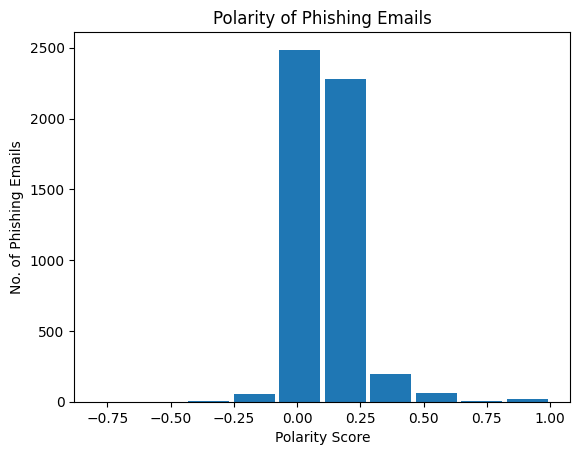

In [79]:
#Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
plt.hist(df[df['Class']==1]['polarity'], rwidth=0.9)
plt.title('Polarity of Phishing Emails')
plt.xlabel('Polarity Score')
plt.ylabel('No. of Phishing Emails')
plt.show()

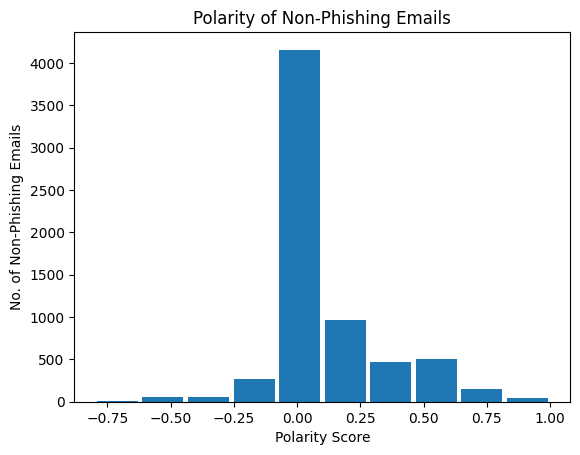

In [80]:
plt.hist(df[df['Class']==0]['polarity'], rwidth=0.9)
plt.title('Polarity of Non-Phishing Emails')
plt.xlabel('Polarity Score')
plt.ylabel('No. of Non-Phishing Emails')
plt.show()

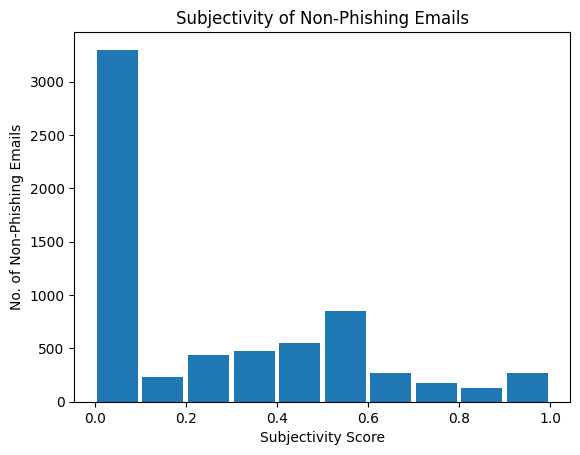

In [81]:
#Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
plt.hist(df[df['Class']==0]['subjectivity'], rwidth=0.9)
plt.title('Subjectivity of Non-Phishing Emails')
plt.xlabel('Subjectivity Score')
plt.ylabel('No. of Non-Phishing Emails')
plt.show()

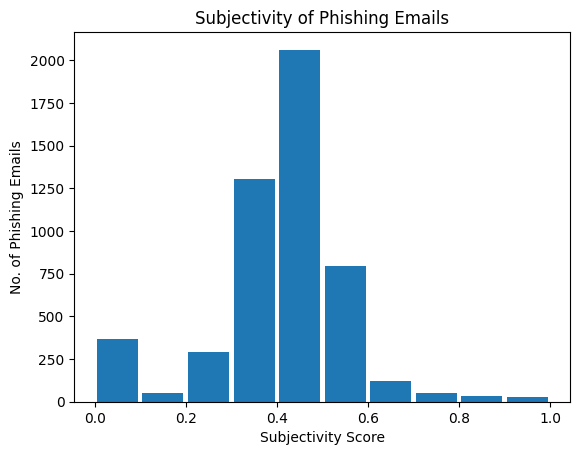

In [82]:
plt.hist(df[df['Class']==1]['subjectivity'], rwidth=0.9)
plt.title('Subjectivity of Phishing Emails')
plt.xlabel('Subjectivity Score')
plt.ylabel('No. of Phishing Emails')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
X = df['subjectivity']
y = df['Class']
X = np.array(X).reshape((len(X), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
#SVM
clf_sub = svm.SVC(kernel='linear')
clf_sub.fit(X_train,y_train)
y_pred = clf_sub.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7150127226463104


              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1965
           1       0.63      0.88      0.73      1572

    accuracy                           0.72      3537
   macro avg       0.74      0.73      0.71      3537
weighted avg       0.76      0.72      0.71      3537



In [85]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
lr_sub = LogisticRegression().fit(X_train, y_train)
y_pred = lr_sub.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


accuracy: 0.5821317500706814


              precision    recall  f1-score   support

           0       0.61      0.71      0.65      1965
           1       0.54      0.42      0.47      1572

    accuracy                           0.58      3537
   macro avg       0.57      0.57      0.56      3537
weighted avg       0.58      0.58      0.57      3537



In [86]:
#NB-Gaussian
from sklearn.naive_bayes import GaussianNB
nb_sub= GaussianNB().fit(X_train,y_train)
y_pred= nb_sub.predict(X_test)
y_pred_sentiment_nb = nb_sub.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7554424653661295


              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1965
           1       0.68      0.85      0.76      1572

    accuracy                           0.76      3537
   macro avg       0.77      0.76      0.76      3537
weighted avg       0.77      0.76      0.76      3537



In [88]:
import pandas as pd

#Source https://github.com/TanusreeSharma/phishingdata-Analysis/tree/master/1st%20data
#New Phishing Email 'https://drive.google.com/file/d/1DSD32etzUkmrIVP7xykrR0N6J5tQYfsB/view?usp=sharing'
#url = 'https://docs.google.com/spreadsheets/d/1jhP5JDKVSCdFIqtQcniiLlq9dR-AU_vo/edit?usp=sharing&ouid=105143275950429665865&rtpof=true&sd=true'
url= 'https://docs.google.com/spreadsheets/d/1ut3Synmx0NEyXvgFykk3RR4Lt2yHkUwb/edit?usp=sharing&ouid=105143275950429665865&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
phish = pd.read_excel(path)
phish.head()

,text,class
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1


## URL ANALYSIS TRAINING MODELING

In [89]:
# Extracting Features Class

import whois
from datetime import datetime, timezone
import math
import pandas as pd
import numpy as np
from pyquery import PyQuery
from requests import get

class UrlFeaturizer(object):
    def __init__(self, url):
        self.url = url
        self.domain = url.split('//')[-1].split('/')[0]
        self.today = datetime.now().replace(tzinfo=None)

        try:
            self.whois = whois.query(self.domain).__dict__
        except:
            self.whois = None

        try:
            self.response = get(self.url)
            self.pq = PyQuery(self.response.text)
        except:
            self.response = None
            self.pq = None

    ## URL string Features
    def entropy(self):
        string = self.url.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return entropy

    def ip(self):
        string = self.url
        flag = False
        if ("." in string):
            elements_array = string.strip().split(".")
            if(len(elements_array) == 4):
                for i in elements_array:
                    if (i.isnumeric() and int(i)>=0 and int(i)<=255):
                        flag=True
                    else:
                        flag=False
                        break
        if flag:
            return 1 
        else:
            return 0

    def numDigits(self):
        digits = [i for i in self.url if i.isdigit()]
        return len(digits)

    def urlLength(self):
        return len(self.url)

    def numParameters(self):
        params = self.url.split('&')
        return len(params) - 1

    def numFragments(self):
        fragments = self.url.split('#')
        return len(fragments) - 1

    def numSubDomains(self):
        subdomains = self.url.split('http')[-1].split('//')[-1].split('/')
        return len(subdomains)-1

    def domainExtension(self):
        ext = self.url.split('.')[-1].split('/')[0]
        return ext

    ## URL domain features
    def hasHttp(self):
        return 'http:' in self.url

    def hasHttps(self):
        return 'https:' in self.url

    def daysSinceRegistration(self):
        if self.whois and self.whois['creation_date']:
            diff = self.today - self.whois['creation_date'].replace(tzinfo=None)
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0

    def daysSinceExpiration(self):
        if self.whois and self.whois['expiration_date']:
            diff = self.whois['expiration_date'].replace(tzinfo=None) - self.today
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0
    
     ## URL Page Features
    def bodyLength(self):
        if self.pq is not None:
            return len(self.pq('html').text()) if self.urlIsLive else 0
        else:
            return 0

    def numTitles(self):
        if self.pq is not None:
            titles = ['h{}'.format(i) for i in range(7)]
            titles = [self.pq(i).items() for i in titles]
            return len([item for s in titles for item in s])
        else:
            return 0

    def numImages(self):
        if self.pq is not None:
            return len([i for i in self.pq('img').items()])
        else:
            return 0

    def numLinks(self):
        if self.pq is not None:
            return len([i for i in self.pq('a').items()])
        else:
            return 0

    def scriptLength(self):
        if self.pq is not None:
            return len(self.pq('script').text())
        else:
            return 0

    def specialCharacters(self):
        if self.pq is not None:
            bodyText = self.pq('html').text()
            schars = [i for i in bodyText if not i.isdigit() and not i.isalpha()]
            return len(schars)
        else:
            return 0

    def scriptToSpecialCharsRatio(self):
        v = self.specialCharacters()
        if self.pq is not None and v!=0:
            sscr = self.scriptLength()/v
        else:
            sscr = 0
        return sscr

    def scriptTobodyRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            sbr = self.scriptLength()/v
        else:
            sbr = 0
        return sbr

    def bodyToSpecialCharRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            bscr = self.specialCharacters()/v
        else:
            bscr = 0
        return bscr

    def urlIsLive(self):
        return self.response == 200

    def run(self):
        data = {}
        # 22 features
        data['entropy'] = self.entropy()
        data['numDigits'] = self.numDigits()
        data['urlLength'] = self.urlLength()
        data['numParams'] = self.numParameters()
        data['hasHttp'] = self.hasHttp()
        data['hasHttps'] = self.hasHttps()
        data['urlIsLive'] = self.urlIsLive()
        data['bodyLength'] = self.bodyLength()
        data['numTitles'] = self.numTitles()
        data['numImages'] = self.numImages()
        data['numLinks'] = self.numLinks()
        data['scriptLength'] = self.scriptLength()
        data['specialChars'] = self.specialCharacters()
        data['ext'] = self.domainExtension()
        data['dsr'] = self.daysSinceRegistration()
        data['dse'] = self.daysSinceExpiration()
        data['sscr'] = self.scriptToSpecialCharsRatio()
        data['sbr'] = self.scriptTobodyRatio()
        data['bscr'] = self.bodyToSpecialCharRatio()
        data['num_%20'] = self.url.count("%20")
        data['num_@'] = self.url.count("@")
        data['has_ip'] = self.ip()
    
        return data

In [90]:
# Phishing and non-phishing URL dataset
url= 'https://drive.google.com/file/d/1BlHR6uSNkBCN4_CRZjuuw02PzeYtgB9M/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
A = pd.read_csv(path)
A.head()

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.282413,6,91,0,True,False,False,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
1,-4.617991,10,70,0,True,False,False,0,0,0,...,article>august,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
2,-4.329320,6,110,0,True,False,False,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,normal_url
3,-4.706447,6,78,0,True,False,False,246796,104,90,...,htmlyour,0,0,0.535639,0.121797,0.227386,0,0,0,normal_url
4,-4.461086,0,61,0,True,False,False,246739,104,90,...,com,0,0,0.534623,0.121594,0.227439,0,0,0,normal_url


In [91]:
A.replace(True,1,inplace = True)
A.replace(False,0,inplace = True)
A.replace("phishing_url1",1,inplace=True)
A.replace("normal_url",0,inplace=True)

In [92]:
A

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.282413,6,91,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,0
1,-4.617991,10,70,0,1,0,0,0,0,0,...,article>august,0,0,0.000000,0.000000,0.000000,0,0,0,0
2,-4.329320,6,110,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,0
3,-4.706447,6,78,0,1,0,0,246796,104,90,...,htmlyour,0,0,0.535639,0.121797,0.227386,0,0,0,0
4,-4.461086,0,61,0,1,0,0,246739,104,90,...,com,0,0,0.534623,0.121594,0.227439,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,-3.921030,0,26,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,1
741,-4.222794,0,48,0,1,0,0,0,0,0,...,uk,0,0,0.000000,0.000000,0.000000,0,0,0,1
742,-4.462993,10,63,0,1,0,0,0,0,0,...,com,0,0,0.000000,0.000000,0.000000,0,0,0,1
743,-4.316286,0,66,1,1,0,0,0,0,0,...,<br>&nbsp;<br>we,0,0,0.000000,0.000000,0.000000,0,0,0,1


In [93]:
#Split dataset to test and train data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = A['Class']

A = A.drop(columns = "Class")
A = A.drop(columns = "ext")

scaler = MinMaxScaler(feature_range=(0, 1))  
X = pd.DataFrame(scaler.fit_transform(A))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(np.array(X_train.columns))
print(X_train.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
RangeIndex(start=0, stop=21, step=1)


In [94]:
# Plotting feature importance graph function
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [95]:
#Model 1 - Gaussian Naive Bayes (supports continuous data) 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

url_nb = GaussianNB()
url_nb.fit(X_train, y_train)

y_pred = url_nb.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.3705357142857143


              precision    recall  f1-score   support

           0       0.30      1.00      0.46        61
           1       1.00      0.13      0.24       163

    accuracy                           0.37       224
   macro avg       0.65      0.57      0.35       224
weighted avg       0.81      0.37      0.30       224



[8.92857143e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.76785714e-02 2.22044605e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.35714286e-03
 0.00000000e+00]
<class 'sklearn.utils._bunch.Bunch'>


Text(0, 0.5, 'FEATURE NAMES')

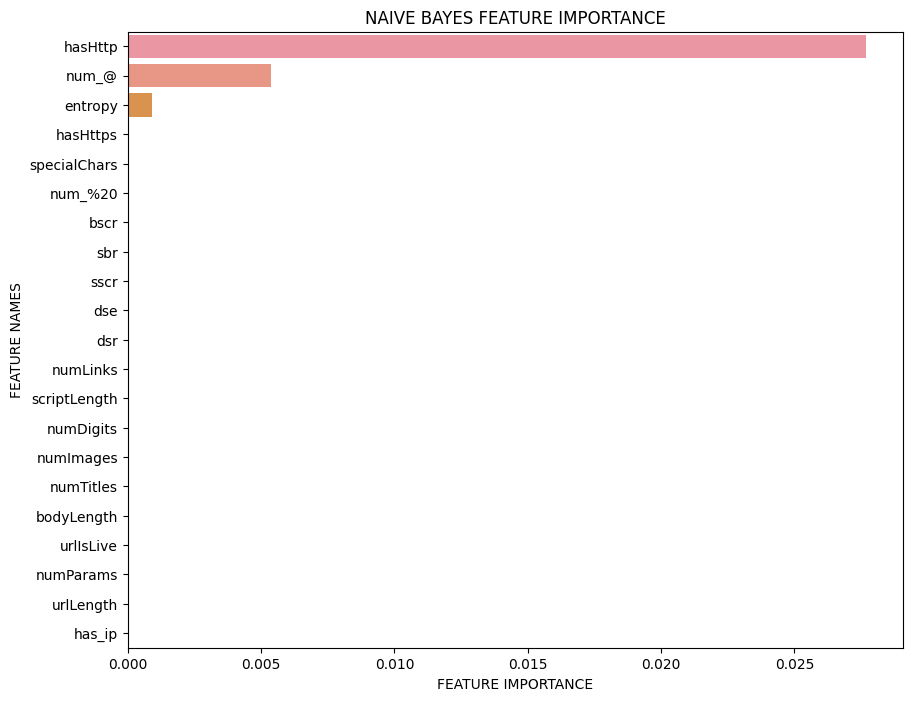

In [96]:
# feature importance 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import permutation_importance

imps = permutation_importance(url_nb, X_test, y_test)

print(imps.importances_mean)
print(type(imps))

#Create a DataFrame using a Dictionary
data={'feature_names':A.columns,'feature_importance':imps.importances_mean}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title("NAIVE BAYES" + ' FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [97]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure

url_log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

url_log_reg.fit(X_train, y_train)

y_pred = url_log_reg.predict(X_test)

print('accuracy: %s' % accuracy_score(y_pred, y_test))
print('\n')
print(classification_report(y_test, y_pred))
type(url_log_reg.coef_)

accuracy: 0.7857142857142857


              precision    recall  f1-score   support

           0       0.84      0.26      0.40        61
           1       0.78      0.98      0.87       163

    accuracy                           0.79       224
   macro avg       0.81      0.62      0.63       224
weighted avg       0.80      0.79      0.74       224



numpy.ndarray

In [98]:
# feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = url_log_reg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 

# plot feature importance

# plot_feature_importance(importance,A.columns,'LOGISTIC REGRESSION ')

Feature: 0, Score: 1.32610
Feature: 1, Score: -0.76645
Feature: 2, Score: 0.08679
Feature: 3, Score: 0.22003
Feature: 4, Score: -1.16350
Feature: 5, Score: 0.04275
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.17031
Feature: 8, Score: -0.01026
Feature: 9, Score: -0.24345
Feature: 10, Score: -2.00638
Feature: 11, Score: -0.30050
Feature: 12, Score: 0.37237
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.14113
Feature: 16, Score: -0.21997
Feature: 17, Score: -0.49961
Feature: 18, Score: -0.19007
Feature: 19, Score: 0.72147
Feature: 20, Score: 0.00000


In [99]:
#Model 3 - SVM
from sklearn import svm
url_clf = svm.SVC(kernel='linear')
url_clf.fit(X_train, y_train)
y_pred = url_clf.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.7366071428571429


              precision    recall  f1-score   support

           0       1.00      0.03      0.06        61
           1       0.73      1.00      0.85       163

    accuracy                           0.74       224
   macro avg       0.87      0.52      0.46       224
weighted avg       0.81      0.74      0.63       224



In [100]:
#Model 4 - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

url_rf = RandomForestClassifier(max_depth=100, random_state=0)
url_rf.fit(X_train, y_train)
y_pred = url_rf.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8482142857142857


              precision    recall  f1-score   support

           0       0.80      0.59      0.68        61
           1       0.86      0.94      0.90       163

    accuracy                           0.85       224
   macro avg       0.83      0.77      0.79       224
weighted avg       0.84      0.85      0.84       224



In [101]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

# get importance
importance = url_rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

# plot_feature_importance(importance,A.columns,'RANDOM FOREST ')

Feature: 0, Score: 0.24502
Feature: 1, Score: 0.13592
Feature: 2, Score: 0.22726
Feature: 3, Score: 0.01962
Feature: 4, Score: 0.00968
Feature: 5, Score: 0.00010
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05237
Feature: 8, Score: 0.03716
Feature: 9, Score: 0.01822
Feature: 10, Score: 0.06552
Feature: 11, Score: 0.02560
Feature: 12, Score: 0.05621
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.03274
Feature: 16, Score: 0.03557
Feature: 17, Score: 0.03538
Feature: 18, Score: 0.00134
Feature: 19, Score: 0.00229
Feature: 20, Score: 0.00000


In [102]:
#Model 5 - Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
url_dt = DecisionTreeClassifier()
url_dt = url_dt.fit(X_train, y_train)
y_pred = url_dt.predict(X_test)

print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8125


              precision    recall  f1-score   support

           0       0.68      0.59      0.63        61
           1       0.85      0.90      0.87       163

    accuracy                           0.81       224
   macro avg       0.77      0.74      0.75       224
weighted avg       0.81      0.81      0.81       224



In [103]:
# feature importance on a classification problem (decision tree)
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get importance
importance = url_dt.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

# plot_feature_importance(importance,A.columns,'DECISION TREE ')

Feature: 0, Score: 0.23991
Feature: 1, Score: 0.14263
Feature: 2, Score: 0.20632
Feature: 3, Score: 0.02279
Feature: 4, Score: 0.02030
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00789
Feature: 8, Score: 0.01838
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.21166
Feature: 11, Score: 0.02588
Feature: 12, Score: 0.03206
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00234
Feature: 16, Score: 0.04275
Feature: 17, Score: 0.02035
Feature: 18, Score: 0.00675
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000


In [105]:
#Model 6 - XGBoost
from xgboost import XGBClassifier
url_xg = XGBClassifier()
url_xg.fit(X_train, y_train)
y_pred = url_xg.predict(X_test)
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8214285714285714


              precision    recall  f1-score   support

           0       0.72      0.56      0.63        61
           1       0.85      0.92      0.88       163

    accuracy                           0.82       224
   macro avg       0.79      0.74      0.76       224
weighted avg       0.81      0.82      0.81       224



In [106]:
# feature importance on a classification problem (xgboost)
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# get importance
importance = url_xg.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

# plot_feature_importance(importance,A.columns,'XGBOOST ')

Feature: 0, Score: 0.03452
Feature: 1, Score: 0.04067
Feature: 2, Score: 0.03425
Feature: 3, Score: 0.05510
Feature: 4, Score: 0.09928
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05887
Feature: 8, Score: 0.06528
Feature: 9, Score: 0.04329
Feature: 10, Score: 0.29826
Feature: 11, Score: 0.06751
Feature: 12, Score: 0.01003
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04133
Feature: 16, Score: 0.12316
Feature: 17, Score: 0.02843
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000


Multi-layer Perceptron Neural Network

In [107]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=99, max_iter=1000)

mlpclf.fit(X_train, y_train)


C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), max_iter=1000,
              random_state=99, solver='lbfgs')

In [108]:
y_pred = mlpclf.predict(X_test)

In [109]:
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

accuracy: 0.8303571428571429


              precision    recall  f1-score   support

           0       0.85      0.46      0.60        61
           1       0.83      0.97      0.89       163

    accuracy                           0.83       224
   macro avg       0.84      0.71      0.74       224
weighted avg       0.83      0.83      0.81       224



## IMPORT FOREIGN DATASET



## EMAIL TEXT TESTING ON NEW DATASET

In [110]:
phish_test = vectorizer.transform(phish['text'])
target = phish['class']

In [111]:
#Using Model 1 (Naive bayes) to predict the new dataset
y_pred_nb = nb.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred_nb))



accuracy: 0.6578341013824884


In [112]:
#Using Model 2 (Logistic regression) to predict the new dataset
y_pred_lr = lr.predict(phish_test)
print('accuracy: %s' % accuracy_score(target, y_pred_lr))
print('\n')
print(classification_report(target, y_pred_lr))

accuracy: 0.6059907834101382


              precision    recall  f1-score   support

           0       0.57      0.99      0.72       450
           1       0.94      0.19      0.32       418

    accuracy                           0.61       868
   macro avg       0.76      0.59      0.52       868
weighted avg       0.75      0.61      0.53       868



In [113]:
#Using Model 3 SVM to predict the new dataset
y_pred_svm = clf.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred_svm))
print('\n')
print(classification_report(target, y_pred_svm))

accuracy: 0.6474654377880185


              precision    recall  f1-score   support

           0       0.60      0.95      0.74       450
           1       0.86      0.32      0.47       418

    accuracy                           0.65       868
   macro avg       0.73      0.64      0.60       868
weighted avg       0.73      0.65      0.61       868



In [114]:
#Using Model 5 Random Forest to predict the new dataset
y_pred = rf.predict(phish_test)

print('accuracy: %s' % accuracy_score(target, y_pred))
print('\n')
print(classification_report(target, y_pred))

accuracy: 0.5138248847926268


              precision    recall  f1-score   support

           0       0.52      0.92      0.66       450
           1       0.47      0.08      0.14       418

    accuracy                           0.51       868
   macro avg       0.49      0.50      0.40       868
weighted avg       0.50      0.51      0.41       868



In [115]:
#Using Model 6 Random Forest (Parameter Tuned) to predict the new dataset
# y_pred  = rf_random.best_estimator_.predict(phish_test)

# print('accuracy: %s' % accuracy_score(target, y_pred))
# print('\n')
# print(classification_report(target, y_pred))

In [116]:
#Using Model 6.5 Random Forest (Parameter Tuned) to predict the new dataset
# y_pred  = rf_grid_best.predict(phish_test)

# print('accuracy: %s' % accuracy_score(target, y_pred))
# print('\n')
# print(classification_report(target, y_pred))

In [117]:
#Using Model 7 xGboost to predict the new dataset
y_pred = xg.predict(phish_test)
print('accuracy: %s' % accuracy_score(target, y_pred))
print('\n')
print(classification_report(target, y_pred))

accuracy: 0.5564516129032258


              precision    recall  f1-score   support

           0       0.55      0.77      0.64       450
           1       0.57      0.33      0.42       418

    accuracy                           0.56       868
   macro avg       0.56      0.55      0.53       868
weighted avg       0.56      0.56      0.53       868



In [118]:
phish.head()

,text,class
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1


In [119]:
traintextlist = []
trainclasslist = []
testtextlist = []
testclasslist = []
i = 0

for index, row in phish.iterrows():
  # split 30%
    if i < len(phish)*0.7:
        traintextlist.append(row['text'])
        trainclasslist.append(row['class'])
    else:
        testtextlist.append(row['text'])
        testclasslist.append(row['class'])
    i += 1
    
print(len(traintextlist), len(testtextlist))

608 260


In [120]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(traintextlist)
X_train = tokenizer.texts_to_matrix(traintextlist)
X_test = tokenizer.texts_to_matrix(testtextlist)
print(len(X_train), len(X_test))


608 260


In [121]:
X_train = sequence.pad_sequences(X_train, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
X_test = sequence.pad_sequences(X_test, maxlen = config.maxlen) 
print(len(X_train), len(X_test))


608 260


In [122]:
y_train = np.array(trainclasslist)
y_test = np.array(testclasslist)
print(len(y_train), len(y_test))
model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

608 260
Epoch 1/30
4/4 [==============================] - 0s 52ms/step - loss: 2.5901 - accuracy: 0.5066 - val_loss: 2.8238 - val_accuracy: 0.5462
Epoch 2/30
4/4 [==============================] - 0s 43ms/step - loss: 1.3067 - accuracy: 0.5724 - val_loss: 1.2066 - val_accuracy: 0.6923
Epoch 3/30
4/4 [==============================] - 0s 42ms/step - loss: 0.6745 - accuracy: 0.6776 - val_loss: 0.7442 - val_accuracy: 0.7000
Epoch 4/30
4/4 [==============================] - 0s 42ms/step - loss: 0.5026 - accuracy: 0.8141 - val_loss: 0.5596 - val_accuracy: 0.7308
Epoch 5/30
4/4 [==============================] - 0s 43ms/step - loss: 0.3408 - accuracy: 0.8668 - val_loss: 0.5923 - val_accuracy: 0.7231
Epoch 6/30
4/4 [==============================] - 0s 43ms/step - loss: 0.2767 - accuracy: 0.8898 - val_loss: 0.6457 - val_accuracy: 0.7038
Epoch 7/30
4/4 [==============================] - 0s 43ms/step - loss: 0.2354 - accuracy: 0.8964 - val_loss: 0.7081 - val_accuracy: 0.6923
Epoch 8/30
4/4 [===

In [127]:
newX = []
newY = []

i = 0
for index, row in phish.iterrows():
    newX.append(row['text'])
    newY.append(row['class'])
    
print(len(newX), len(newY))

868 868


In [124]:
# newX[:5]

In [125]:
# newY[:5]

In [128]:
tokenizer = text.Tokenizer(num_words = config.vocab_size)
tokenizer.fit_on_texts(newX)
newX = tokenizer.texts_to_matrix(newX)
# new_test = tokenizer.texts_to_matrix(newY)
print(len(newX))

868


In [129]:
newX = sequence.pad_sequences(newX, maxlen = config.maxlen) # fill in empty spaces if dun have least maxlen words
# new_test = sequence.pad_sequences(new_test, maxlen = config.maxlen) 
print(len(newX), len(newY))

868 868


In [130]:
newY = np.array(newY)
print(len(newX), len(newY))

868 868


In [131]:
# model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
#          callbacks = [WandbCallback()])

In [132]:
# model.summary()

In [133]:
newY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [134]:
newX[:5]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [135]:
model.fit(X_train, y_train, batch_size = config.batch_size, epochs = config.epochs, validation_data = (X_test, y_test), 
         callbacks = [WandbCallback()])

Epoch 1/30
4/4 [==============================] - 0s 51ms/step - loss: 0.1135 - accuracy: 0.9572 - val_loss: 0.4640 - val_accuracy: 0.7846
Epoch 2/30
4/4 [==============================] - 0s 44ms/step - loss: 0.1108 - accuracy: 0.9638 - val_loss: 0.4418 - val_accuracy: 0.7846
Epoch 3/30
4/4 [==============================] - 0s 43ms/step - loss: 0.1107 - accuracy: 0.9638 - val_loss: 0.4269 - val_accuracy: 0.7923
Epoch 4/30
4/4 [==============================] - 0s 44ms/step - loss: 0.1131 - accuracy: 0.9622 - val_loss: 0.4273 - val_accuracy: 0.7923
Epoch 5/30
4/4 [==============================] - 0s 45ms/step - loss: 0.1072 - accuracy: 0.9655 - val_loss: 0.4415 - val_accuracy: 0.7923
Epoch 6/30
4/4 [==============================] - 0s 45ms/step - loss: 0.1132 - accuracy: 0.9638 - val_loss: 0.4538 - val_accuracy: 0.7885
Epoch 7/30
4/4 [==============================] - 0s 45ms/step - loss: 0.1039 - accuracy: 0.9671 - val_loss: 0.4798 - val_accuracy: 0.7885
Epoch 8/30
4/4 [===========

In [136]:
y_pred = np.argmax(model.predict(newX),axis=1)
y_pred

28/28 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [137]:
newY[:5]

array([1, 1, 1, 1, 1])

In [138]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
accuracy_score(y_pred, newY)

0.5184331797235023

In [140]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [141]:
newY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [142]:
print(len(newY), len(y_pred))

868 868


In [143]:
newY[1]

1

In [144]:
# true_positive = 0
# true_negative = 0
# false_positive = 0
# false_negative = 0
# for x in range(868):
#   predy = y_pred[x]
#   modely = newY[x]
#   if (predy == 1) and (modely == predy):
#     true_positive += 1
#   elif (predy == 1) and (modely != predy):
#     false_positive += 1
#   elif (predy == 0) and (modely == predy):
#     true_negative += 1
#   else:
#     false_negative += 1

# print(true_positive, true_negative, false_positive, false_negative)

In [145]:
print(classification_report(y_pred, newY))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       868
           1       0.00      0.00      0.00         0

    accuracy                           0.52       868
   macro avg       0.50      0.26      0.34       868
weighted avg       1.00      0.52      0.68       868



C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## SUBJECTIVITY TESTING ON NEW DATASET

In [146]:
#textblob new data
phish['polarity'] = phish['text'].apply(blob_polarity)
phish['subjectivity'] = phish['text'].apply(blob_subjectivity)
phish.head()

,text,class,polarity,subjectivity
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000


In [147]:
#SVM
X = np.array(phish['subjectivity']).reshape((len(phish['subjectivity']), 1))
y_pred_svm_sub = clf_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_svm_sub))
print('\n')
print(classification_report(target, y_pred_svm_sub))

accuracy: 0.35368663594470046


              precision    recall  f1-score   support

           0       0.36      0.32      0.34       450
           1       0.35      0.39      0.36       418

    accuracy                           0.35       868
   macro avg       0.35      0.35      0.35       868
weighted avg       0.35      0.35      0.35       868



In [148]:
#LR
y_pred_lr_sub = lr_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_lr))
print('\n')
print(classification_report(target, y_pred_lr))

accuracy: 0.6059907834101382


              precision    recall  f1-score   support

           0       0.57      0.99      0.72       450
           1       0.94      0.19      0.32       418

    accuracy                           0.61       868
   macro avg       0.76      0.59      0.52       868
weighted avg       0.75      0.61      0.53       868



In [149]:
#NB Gaussian
y_pred_nb_sub= nb_sub.predict(X)

print('accuracy: %s' % accuracy_score(target, y_pred_nb))
print('\n')
print(classification_report(target, y_pred_nb))

accuracy: 0.6578341013824884


              precision    recall  f1-score   support

           0       0.68      0.63      0.66       450
           1       0.63      0.69      0.66       418

    accuracy                           0.66       868
   macro avg       0.66      0.66      0.66       868
weighted avg       0.66      0.66      0.66       868



## URL TESTING ON NEW DATASET

In [150]:
phish = phish.rename(columns={'class': 'Class'})
phish

,text,Class,polarity,subjectivity
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000
...,...,...,...,...
863,"check out the latest issue of ebiz at home . enron . com . click on publications ,then on ebiz and "" july 14 , 2000 . ""in this issue :enrononline extends to additional trading platformsprice caps in the california power marketweather hedging for wine barsenron directo begins selling power in spainthe new power company acquires customerslng transporter brings natural gas to puerto rico",0,0.245455,0.584848
864,"shirley : we ' ve also been in touch with frank . he wasn ' t going to receivehis class schedule until yesterday , so we will follow up today and find amutually convenient date .mollyshirley crenshaw01 / 16 / 2001 09 : 51 amto : molly magee / hou / ect @ ectcc : vince j kaminski / hou / ect @ ect , kevin kindall / corp / enron @ enron , boblee / na / enron @ enronsubject : re : qian ( frank ) feng interview with the research grouphi molly :i guess it is time to try and schedule frank ' s int...",0,0.475000,0.466667
865,"enron energy services , inc . ( "" eesi "" )message sent out to the industry by one of frank hilton ' s girls at aep .",0,0.000000,0.000000
866,"bob ,could you help me find out who owns the gas at this meter . . . . . .thank youmaryext . 35251mary poorman08 / 01 / 2000 01 : 04 pmto : pat clynes / corp / enron @ enroncc :subject : meter # 0986563 -pat ,this is the texaco fee cp , it flowed a total of 1 , 517 from dec 99 to apr 22000 . there is a strangers agmt . set up to take allocations , however , thismust be a wellhead related pt . that has declined . how do i go about findingout who this belongs to ? i thought about ringing texac...",0,-0.083333,0.454167


In [151]:
#Extracting url from the text
import re
phish['Url'] = phish['text'].apply(lambda x: re.findall("http\S+",x)[0] if re.findall("http\S+",x)!=[] else None)
phish

,text,Class,polarity,subjectivity,Url
0,"This text is part of the internal format of your mail folder, and is nota real message. It is created automatically by the mail system software.If deleted, important folder data will be lost, and it will be re-createdwith the data reset to initial values.",1,0.150000,0.325000,None
1,"Dear Customer, Your package has been returned to the FedEx Office.The reason for the return is - payment of shipping costs.the cost of your shipment is not paid . so you will be charged to pay handling cost 6,53 $ (USD)You have a period of 48 hours to recover your package, otherwise it will be returned to the sender.Click here to view the status of your shipment :https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx Support Team",1,0.000000,0.000000,https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx
2,"Your document has been completed.VIEW COMPLETED DOCUMENT All signers completed Please DocuSign: Offer1116-07474_jose.pdf About DocuSignSign documents electronically in just minutes. It's safe, secure, and legally binding. Whether you're in an office, at home, on-the-go -- or even across the globe -- DocuSign provides a professional trusted solution for Digital Transaction Management™.Download the DocuSign App",1,0.240000,0.280000,None
3,Voice Mail -----------------------------------------------------------------You have recived a New Voice Message from +1-800-90-8767,1,0.136364,0.454545,None
4,"Play VoiceMail (32.6kb) (https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This E-mail was sent from someone in your contact list, if youare receiving this in error, click Click Here(https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)to move to spam",1,0.000000,0.000000,https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This
...,...,...,...,...,...
863,"check out the latest issue of ebiz at home . enron . com . click on publications ,then on ebiz and "" july 14 , 2000 . ""in this issue :enrononline extends to additional trading platformsprice caps in the california power marketweather hedging for wine barsenron directo begins selling power in spainthe new power company acquires customerslng transporter brings natural gas to puerto rico",0,0.245455,0.584848,None
864,"shirley : we ' ve also been in touch with frank . he wasn ' t going to receivehis class schedule until yesterday , so we will follow up today and find amutually convenient date .mollyshirley crenshaw01 / 16 / 2001 09 : 51 amto : molly magee / hou / ect @ ectcc : vince j kaminski / hou / ect @ ect , kevin kindall / corp / enron @ enron , boblee / na / enron @ enronsubject : re : qian ( frank ) feng interview with the research grouphi molly :i guess it is time to try and schedule frank ' s int...",0,0.475000,0.466667,None
865,"enron energy services , inc . ( "" eesi "" )message sent out to the industry by one of frank hilton ' s girls at aep .",0,0.000000,0.000000,None
866,"bob ,could you help me find out who owns the gas at this meter . . . . . .thank youmaryext . 35251mary poorman08 / 01 / 2000 01 : 04 pmto : pat clynes / corp / enron @ enroncc :subject : meter # 0986563 -pat ,this is the texaco fee cp , it flowed a total of 1 , 517 from dec 99 to apr 22000 . there is a strangers agmt . set up to take allocations , however , thismust be a wellhead related pt . that has declined . how do i go about findingout who this belongs to ? i thought about ringing texac...",0,-0.083333,0.454167,None


In [152]:
phish_url_df = phish[['Url','Class']]
phish_url_df.dropna(inplace=True)
phish_url_df.head(15)

C:\Users\Lim Yin Shan\AppData\Local\Temp\ipykernel_21580\3928042402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phish_url_df.dropna(inplace=True)


,Url,Class
1,https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx,1
4,https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This,1
6,https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org),1
11,https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org),1
273,https://dscollege.ac.in/monday/userid/chudy/?i3Di&03Djose@monkey.org,1
276,http://tk.mktla.com/m/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg,1
277,http://tk.mktla.com/u/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg,1
290,https://wetranecure-lastime.eu-gb.cf.appdomain.cloud/4e1ddb32575cb3121062942/c8807144c16d5de7fbe4780ae9f1f42106294236/ad91ea3,1
337,https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Den_US,1
338,"https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html""Charles",1


In [153]:
# converting url to each row with corresponding class
#s = phish_url_df.apply(lambda x: pd.Series(x['Url']),axis=1).stack().reset_index(level=1, drop=True)
#s.name = 'Url'
#phish_url_df = phish_url_df.drop('Url', axis=1).join(s)
#phish_url_df.dropna(subset=['Url'], inplace=True)
# phish_url_df['Url'] = phish_url_df['Url'].fillna("")

#print(len(phish_url_df))
#phish_url_df

In [159]:
# Extracting Features for each URL 
emp = UrlFeaturizer("").run().keys()

new_URL_features = pd.DataFrame(columns = emp)
t=[]
results = []
print("len",len(phish_url_df))
error_list= []

for row in phish_url_df.itertuples():
    cate = row.Class
    url_link = row.Url
    
    print("row", str(cate) + " " + url_link)
    print("type", type(url_link))
    
    try:
        temp=UrlFeaturizer(url_link).run()
        print("success")
        temp["Class"]=cate
        t.append(temp)
        results.append(row.Index)
        
    except:
        error_list.append(row)
        continue
  
# new_URL_features=new_URL_features.append(t)
if t:
    new_URL_features = pd.DataFrame(t)

print("new",len(new_URL_features))
print(error_list)

# A.to_csv("features_final.csv")

len 37
row 1 https:/fedex.com/en-fr/tracking/domestic/cost-shipping/384789299FedEx
type <class 'str'>
success
row 1 https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This
type <class 'str'>


we have app


row 1 https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org)
type <class 'str'>
row 1 https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org)
type <class 'str'>
row 1 https://dscollege.ac.in/monday/userid/chudy/?i3Di&03Djose@monkey.org
type <class 'str'>


we have app
we have app
we have in


row 1 http://tk.mktla.com/m/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg
type <class 'str'>
success
row 1 http://tk.mktla.com/u/ZqbN3j6bcms-fYPdnwN_YOz-6bcqlaUuMbo-KPHcMYkEZJs7Rhwe67vUQAx74wIkBFthg_knsQ9_Agku6NUzeMtoCF0TFjns6pW8ZmpPi9vcBNXYpS_nrt8Ox6Wj5G7_iQyaXIpn_fsBYWbolNp7QLncBnN7P9HpAg
type <class 'str'>
success
row 1 https://wetranecure-lastime.eu-gb.cf.appdomain.cloud/4e1ddb32575cb3121062942/c8807144c16d5de7fbe4780ae9f1f42106294236/ad91ea3
type <class 'str'>


we have com
we have com
we have cloud


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Den_US
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Des_ES
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Dfr_FR
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlDo
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlEste
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlCeci
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Den_US
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Des_ES
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Dfr_FR
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlDo
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlEste
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlCeci
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Den_US
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Des_ES
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.html"Charles
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D759e9a326582993e&enterprise3Dcid_300627_ext&rrRegcode3Dt94cJpHz&locale3Dfr_FR
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlDo
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlEste
type <class 'str'>


we have com


row 1 https://securemail.smarshbusinesscloud.com/branding/help/default/Default.htm?brand3Dcid_300627_ext&context3D/help/index.htmlCeci
type <class 'str'>


we have com


row 1 https://wetransfer.com/downloads/7b03bb5bdae767a0bc6fa28b3c2f912106002229/7c6ca5e66b2c2354c46e58f7e86a47fe2106002229/228b3bwettransfr.pw/download/2
type <class 'str'>


we have com


row 1 http/portal/jose@monkey.org/wp-%inbox/monkey.org/loginempty-mailbox-mail-sln29338.htmlWe
type <class 'str'>
success
row 1 https.//dhl.com/apps/dhltrack/?[[-Email-]]9467957950
type <class 'str'>
success
row 0 https
type <class 'str'>
success
row 0 https
type <class 'str'>
success
new 7
[Pandas(Index=4, Url='https://mayaadri-an32.web.app/saklncsao.html#jose@monkey.org)-----------------------------------------------------------------This', Class=1), Pandas(Index=6, Url='https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org)', Class=1), Pandas(Index=11, Url='https://mayaadri-an32.web.app/mkasiwas.html#jose@monkey.org)', Class=1), Pandas(Index=273, Url='https://dscollege.ac.in/monday/userid/chudy/?i3Di&03Djose@monkey.org', Class=1), Pandas(Index=290, Url='https://wetranecure-lastime.eu-gb.cf.appdomain.cloud/4e1ddb32575cb3121062942/c8807144c16d5de7fbe4780ae9f1f42106294236/ad91ea3', Class=1), Pandas(Index=337, Url='https://securemail.smarshbusinesscloud.com/login.html?msgUserId3D7

we have com


In [160]:
results

[1, 276, 277, 410, 416, 463, 790]

In [161]:
new_URL_features

,entropy,numDigits,urlLength,numParams,hasHttp,hasHttps,urlIsLive,bodyLength,numTitles,numImages,...,ext,dsr,dse,sscr,sbr,bscr,num_%20,num_@,has_ip,Class
0,-4.622967,9,69,0,False,True,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1
1,-5.713670,21,184,0,True,False,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1
2,-5.718316,21,184,0,True,False,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1
3,-4.575774,5,88,0,False,False,False,0,0,0,...,htmlWe,0,0,0,0,0,0,1,0,1
4,-4.543921,10,52,0,False,False,False,0,0,0,...,com,0,0,0,0,0,0,0,0,1
5,-1.921928,0,5,0,False,False,False,0,0,0,...,https,0,0,0,0,0,0,0,0,0
6,-1.921928,0,5,0,False,False,False,0,0,0,...,https,0,0,0,0,0,0,0,0,0


In [162]:
new_URL_features.replace(True,1,inplace = True)
new_URL_features.replace(False,0,inplace = True)
new_URL_features.replace(1.0,1,inplace=True)
new_URL_features.replace(0.0,0,inplace=True)

In [163]:
from sklearn.preprocessing import MinMaxScaler

target = new_URL_features['Class']

new_URL_features = new_URL_features.drop(columns = "Class")
new_URL_features = new_URL_features.drop(columns = "ext")

scaler = MinMaxScaler(feature_range=(0, 1))  
new_URL_test = pd.DataFrame(scaler.fit_transform(new_URL_features))

In [164]:
#Using Model 1 (Naive bayes) to predict the new dataset for URL
y_pred_url_nb = url_nb.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_nb))
print('\n')
print(classification_report(target, y_pred_url_nb))

accuracy: 0.42857142857142855


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.60      0.60         5

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7



In [165]:
#Using Model 2 (Logistic regression) to predict the new dataset
y_pred_url_lr = url_log_reg.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_lr))
print('\n')
print(classification_report(target, y_pred_url_lr))

accuracy: 0.42857142857142855


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.60      0.60         5

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7



In [166]:
#Model 3 (SVM) to predict new dataset
from sklearn import svm

y_pred_url_svm = url_clf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_svm))
print('\n')
print(classification_report(target, y_pred_url_svm))

accuracy: 0.7142857142857143


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lim Yin Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [167]:
#Model 4 - Decision Tree

y_pred_url_dt = url_dt.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_dt))
print('\n')
print(classification_report(target, y_pred_url_dt))

accuracy: 0.7142857142857143


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



In [168]:
#Model 5 - Random Forest 

y_pred_url_rf = url_rf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_rf))
print('\n')
print(classification_report(target, y_pred_url_rf))
print(url_rf.get_params())

accuracy: 0.7142857142857143


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [169]:
# Model 6 - XGBoost

y_pred_url_xg = url_xg.predict(new_URL_test)
print('accuracy: %s' % accuracy_score(target, y_pred_url_xg))
print('\n')
print(classification_report(target, y_pred_url_xg))

accuracy: 0.42857142857142855


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.60      0.60         5

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7



In [170]:
y_pred_url_xg

array([1, 0, 0, 1, 1, 1, 1])

In [185]:
a = np.array([],dtype = int)

print(len(phish))
print(len(y_pred_url_xg))
x = int(len(phish)-len(y_pred_url_xg))
for i in range(x):
    a = np.append(a,0)

a
print(len(a))

868
7


TypeError: 'numpy.float64' object is not callable

In [186]:
# np.insert(a, 2, 66)

for i in range(len(results)):
  a = np.insert(a, results[i], y_pred_url_xg[i])
  print(results[i])
  print(y_pred_url_xg[i])

print(len(a))

TypeError: 'numpy.float64' object is not callable

In [187]:
print(a[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
y_pred_url_xg = a
y_pred_url_xg

In [ ]:
#Model 4 - Decision Tree

y_pred_url_dt = mlpclf.predict(new_URL_test)

print('accuracy: %s' % accuracy_score(target, y_pred_url_dt))
print('\n')
print(classification_report(target, y_pred_url_dt))

## COMBINING MODELS THOUGH VOTING

In [ ]:
#Voting by combining the models
df_voting0 = pd.DataFrame(y_pred_nb_sub,columns=['Subjectivity_nb'])
df_voting0['Text_Message_svm'] = y_pred_svm
df_voting0['URL_xgb'] = y_pred_url_xg

df_voting0['total_vote'] = df_voting0['Subjectivity_nb'] + df_voting0['Text_Message_svm'] + df_voting0['URL_xgb']
df_voting0['pred'] = [1 if x>1 else 0 for x in df_voting0['total_vote']]
metrics(target,df_voting0['pred'])

In [ ]:
df_voting0

In [ ]:
plot_cm(target,df_voting0['pred'])

In [ ]:
# df_voting['actual'] = target
# df_voting.head(30)

In [ ]:
# len(df_voting)

In [ ]:
# df_voting0.info()


In [ ]:
# #Voting by combining the models OLD DATASET
# df_voting = pd.DataFrame(y_pred_sentiment_nb,columns=['Subjectivity_nb'])
# df_voting['Text_Message_nb'] = y_pred_model_svm
# # df_voting['URL_xgb'] = y_pred_url_xg
# # df_voting['total_vote'] = df_voting['Subjectivity_nb'] + df_voting['Text_Message_nb'] + df_voting['URL_xgb']
# df_voting['total_vote'] = df_voting['Subjectivity_nb'] + df_voting['Text_Message_nb']
# df_voting['pred'] = [0 if x<1 else 1 for x in df_voting['total_vote']]
# df_voting
# print('accuracy: %s' % accuracy_score(list(y_test), df_voting['pred']))
# print('\n')
# print(classification_report(list(y_test), df_voting['pred']))

In [ ]:
# df_voting0['actual'] = list(y_test)
# df_voting0.head(30)